# Data Analysis & Visualization with Python

# Analysis of US Citizens by Income Levels

Aim of the Project
Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;

1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

In [2]:
#Importing Related Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
# to disable scientific notation 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# to reset to the original settings we can use
# pd.reset_option('display.float_format', silent=True)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Plotly Express can be used as a Pandas .plot() backend.
# pd.options.plotting.backend = "plotly"

In [3]:
df0 = pd.read_csv("adult_eda.csv", sep=",")
df = df0.copy()

1. Try to understand what the data looks like.

Check the head, shape, data-types of the features.
Check if there are some dublicate rows or not. If there are, then drop them.
Check the statistical values of features.
If needed, rename the columns' names for easy use.
Basically check the missing values.

In [4]:
df.head() 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [8]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [9]:
# Drop Duplicated rows with df.drop_duplicates(inplace=True) permanently

df.drop_duplicates(keep='first', inplace=True)  

In [10]:
# Checking and detecting the duplicated rows

df.duplicated().value_counts()  

False    32537
dtype: int64

In [11]:
# Descriptive Statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.000,38.586,13.638,17.000,28.000,37.000,48.000,90.000
fnlwgt,32537.000,189780.849,105556.471,12285.000,117827.000,178356.000,236993.000,1484705.000
education-num,31735.000,10.084,2.575,1.000,9.000,10.000,12.000,16.000
capital-gain,32537.000,1078.444,7387.957,0.000,0.000,0.000,0.000,99999.000
capital-loss,32537.000,87.368,403.102,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32537.000,40.440,12.347,1.000,40.000,40.000,45.000,99.000


In [12]:
# Changing the names of some columns for convenience

df.rename(columns={"education-num" : "education_num",
                   "marital-status" : "marital_status",
                   "capital-gain" : "capital_gain",
                   "capital-loss": "capital_loss",
                   "hours-per-week" : "hours_per_week",
                   "native-country" : "native_country",
                   "sex" : "gender"},
          inplace=True)

In [13]:
# Checking the sum of Missing Values per column

df.isnull().sum() 

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [14]:
# Check the Percentage of Missing Values for each column. len(df): 32537

df.isnull().sum() / df.shape[0] * 100  

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education_num     2.465
marital_status    0.000
occupation        0.000
relationship     15.564
race              0.000
gender            0.000
capital_gain      0.000
capital_loss      0.000
hours_per_week    0.000
native_country    0.000
salary            0.000
dtype: float64

In [15]:
# Missing Value Information Per Column
missing_count = df.isnull().sum()
missing_per = df.isnull().sum()/df.shape[0]*100

missing_df = pd.concat({"missing_count": missing_count, "missing_percentage": missing_per}, axis=1)
missing_df

,missing_count,missing_percentage
age,0,0.000
workclass,0,0.000
fnlwgt,0,0.000
education,0,0.000
education_num,802,2.465
marital_status,0,0.000
occupation,0,0.000
relationship,5064,15.564
race,0,0.000
gender,0,0.000


In [17]:
def show_nulls(data):
    
    '''
    
    This function plots missing values for each column by observation in the dataset.
    
    ''' 
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

<Figure size 720x360 with 0 Axes>

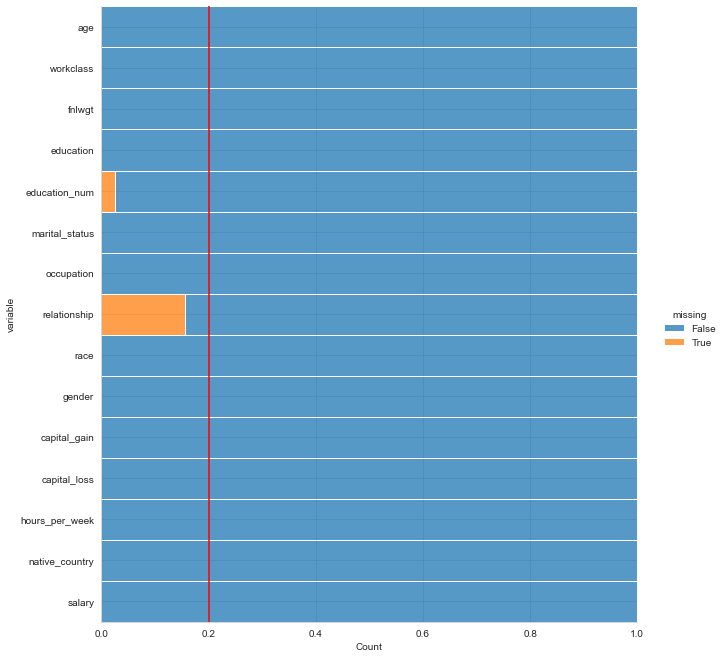

In [18]:
show_nulls(df)

2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [20]:
# Descriptive Statistics of Categorical Features in the Dataset
# So we selected the categorical columns using the select_dtypes() function.

df.describe(include="object").T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,27473,5,Husband,13187
race,32537,5,White,27795
gender,32537,2,Male,21775
native_country,32537,42,United-States,29153
salary,32537,2,<=50K,24698


In [21]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

In [22]:
# Checking uniques and their numbers at Categorical Features in the Dataset

for col in object_col:
    print(col)
    print("--"*13)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
--------------------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
--------------------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
--------------------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
M

In [23]:
# Checking if any column includes "?" as an input

df[df.isin(['?'])].any()

# df.isin(["?"]).sum(axis=0)

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
gender            False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

# Univariate & Multivariate Analysis

to-do list for numeric features:

Check the boxplot to see extreme values
Check the histplot/kdeplot to see distribution of feature
Check the statistical values
Check the boxplot and histplot/kdeplot by "salary" levels
Check the statistical values by "salary" levels
Write down the conclusions you draw from your analysis

to-do list for categoric features:

Find the features which contains similar values, examine the similarities and analyze them together
Check the count/percentage of person in each categories and visualize it with a suitable plot
If need, decrease the number of categories by combining similar categories
Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
Write down the conclusions you draw from your analysis

Salary (Target Feature)

In [24]:
# Checking the counts of unique values in "salary" feature

df.salary.value_counts(dropna=False)

<=50K    24698
>50K      7839
Name: salary, dtype: int64

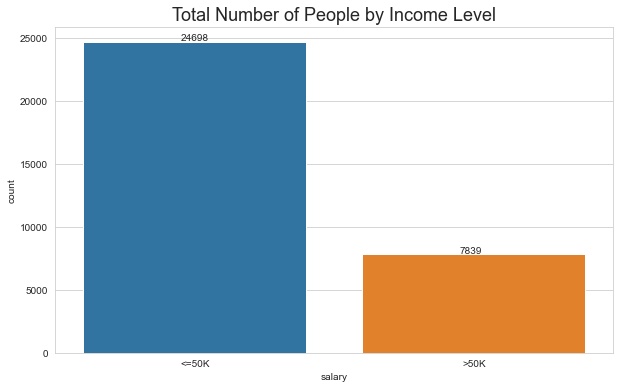

In [25]:
# Visualizing the number of people in each category of "salary"

fig, ax = plt.subplots()

sns.countplot(data=df, x="salary")

ax.set_title("Total Number of People by Income Level", fontsize=18)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+100))

In [26]:
# Checking the proportion of people who make above 50K and under 50K

df.salary.value_counts(normalize=True)

<=50K   0.759
>50K    0.241
Name: salary, dtype: float64

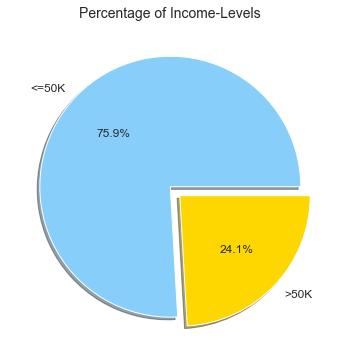

In [27]:
# Visualing the percentage of distribution in the salary feature

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df.salary.value_counts().values, 
       labels=['<=50K', '>50K'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Percentage of Income-Levels", fontdict={'fontsize': 14})
plt.show()

Numeric Features

Age

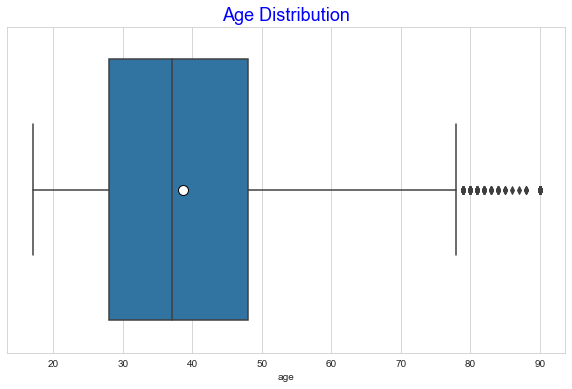

In [28]:
sns.boxplot(data=df, 
            x="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Age Distribution", fontsize=18, color="b");

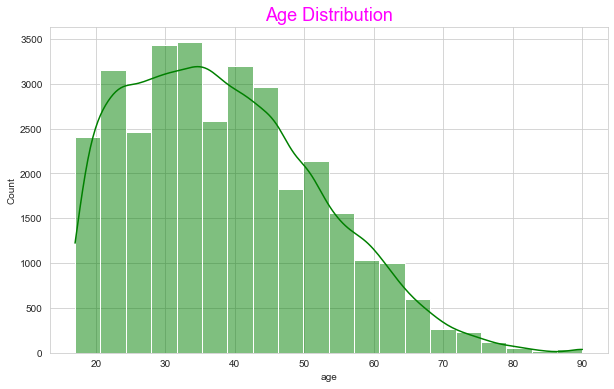

In [29]:
# Displaying the distribution of age feature with a histogram

sns.histplot(data=df, x="age", bins=20, kde=True, color="g")

plt.title("Age Distribution", fontsize=18, color="fuchsia");

In [31]:
# Descriptive Statistics of "age" Feature


df.age.describe()

count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

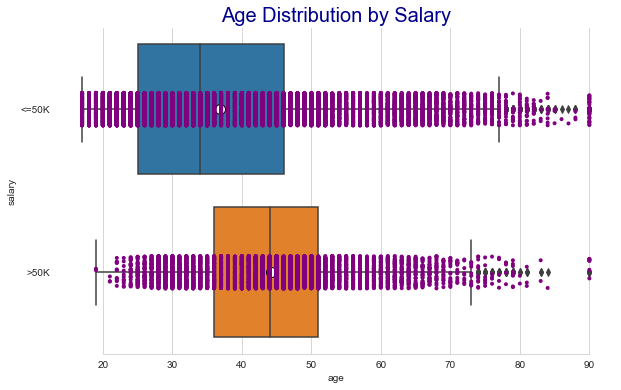

In [36]:
# Checking the extreme values in "age" feature by Salary with box plot

sns.boxplot(data=df, 
            y="salary", 
            x="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Add in points to show each observation
sns.stripplot(data=df,
              y="salary", 
              x="age",
              size=4, 
              color="purple", 
              linewidth=0)

# Tweaking the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

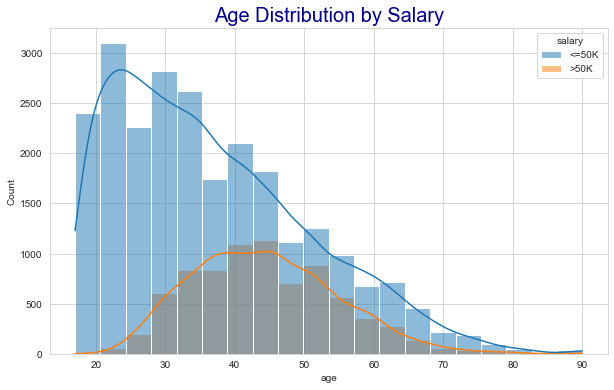

In [37]:
# Checking Density Distribution of "age" feature by Salary 

sns.histplot(data=df, x="age", bins=20, kde=True, hue="salary")

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

In [38]:
# Descriptive Statistics of age with respect to salary levels


df.groupby("salary").age.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,36.787,14.017,17.000,25.000,34.000,46.000,90.000
>50K,7839.000,44.251,10.520,19.000,36.000,44.000,51.000,90.000


fnlwgt

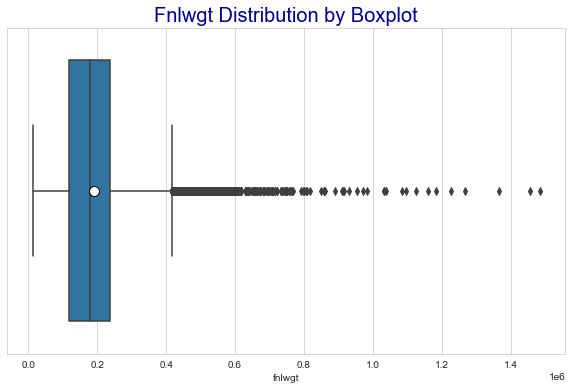

In [40]:
# Checking the extreme values in "fnlwgt" feature by means of box plot

sns.boxplot(data=df, 
            x="fnlwgt",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Fnlwgt Distribution by Boxplot", fontsize=20, color="darkblue");

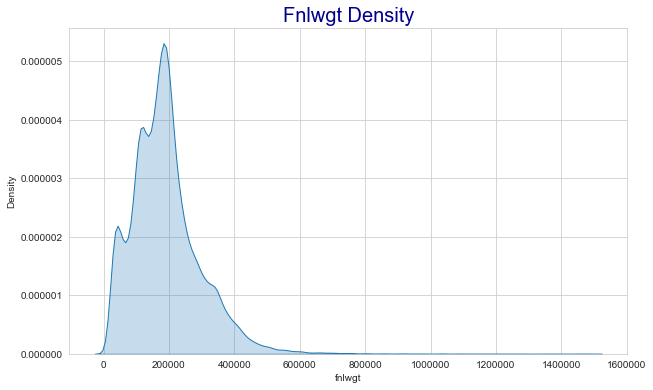

In [41]:
# Checking Density Distribution of "fnlwgt" feature 

sns.kdeplot(data=df, x="fnlwgt", fill=True)

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Fnlwgt Density", fontsize=20, color="darkblue");

In [42]:
# Descriptive Statistics of "fnlwgt" Feature

df.fnlwgt.describe()

count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

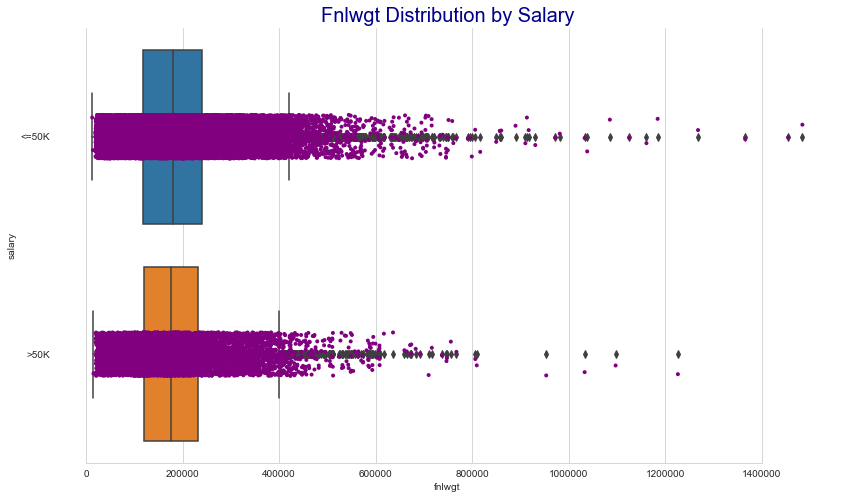

In [43]:
# Checking the extreme values in "fnlwgt" feature by Salary with box plot

plt.figure(figsize=(14, 8))

sns.boxplot(data=df, 
            y="salary", 
            x="fnlwgt",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Adding in points to show each observation
sns.stripplot(data=df,
              y="salary", 
              x="fnlwgt",
              size=4, 
              color="purple", 
              linewidth=0)

# Tweaking the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title("Fnlwgt Distribution by Salary", fontsize=20, color="darkblue")
plt.ticklabel_format(style='plain', axis='x');

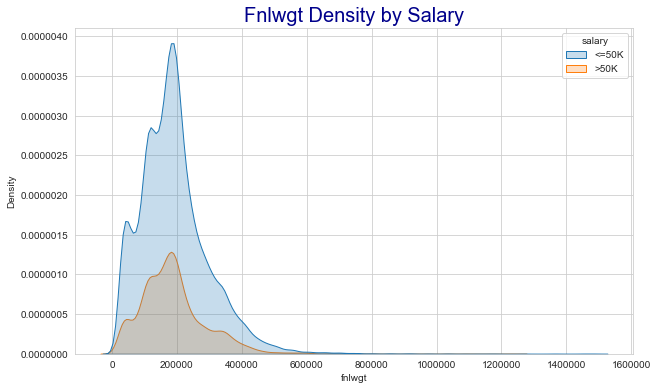

In [44]:
# Checking Density Distribution of "fnlwgt" feature by Salary

ax = sns.kdeplot(data=df, x="fnlwgt", hue="salary", fill=True)

plt.title("Fnlwgt Density by Salary", fontsize=20, color="darkblue")

ax.ticklabel_format(style='plain');

In [45]:
# Descriptive Statistics of "fnlwgt" with respect to salary levels


df.groupby("salary").fnlwgt.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,190345.927,106487.413,12285.000,117606.000,179465.000,238968.250,1484705.000
>50K,7839.000,188000.481,102554.464,14878.000,119100.000,176063.000,230969.000,1226583.000


capital_gain

In [46]:
# We can build a function that highlights the maximum value across rows, cols, and the DataFrame all at once.

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

In [47]:
# Descriptive Statistics of the "capital_loss" by "workclass", "occupation"


df.groupby(["workclass", "occupation"])["capital_gain"].describe()\
                             .style.apply(highlight_max, props='color: white; background-color: #33FFF9;', axis=0)\
                             .apply(highlight_max, props='color: white; background-color: pink;', axis=1)\
                             .apply(highlight_max, props='color: white; background-color: purple', axis=None)

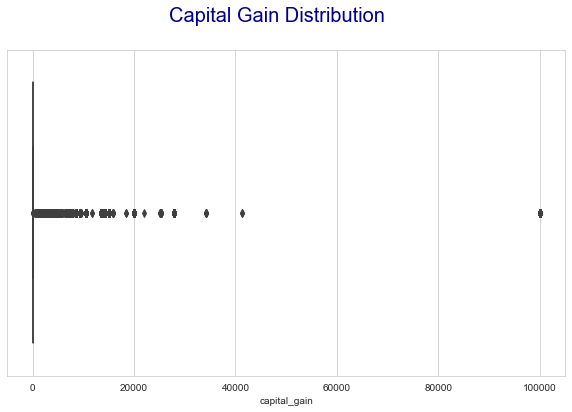

In [48]:
# Checking the extreme values in the "capital_gain" feature with box plot

sns.boxplot(data=df, x="capital_gain")

plt.suptitle("Capital Gain Distribution", fontsize=20, color="darkblue");

In [49]:
# Descriptive Statistics of "capital_gain" Feature

df.capital_gain.describe()

count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

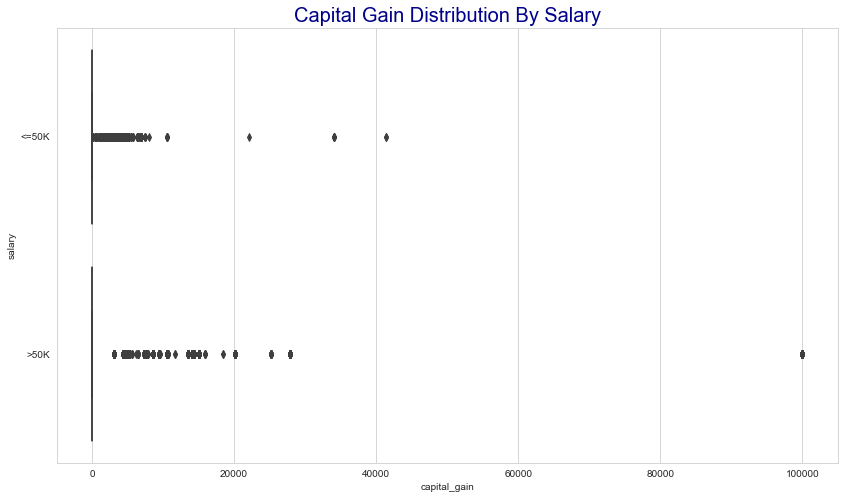

In [50]:
# Checking the extreme values in the "capital_gain" feature by Salary with box plot

plt.figure(figsize=(14, 8))

sns.boxplot(data=df, 
            y="salary", 
            x="capital_gain")

# # Adding in points to show each observation
# sns.stripplot(data=df,
#               y="salary", 
#               x="capital_gain",
#               size=4, 
#               color="purple", 
#               linewidth=0)

# # Tweaking the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)

plt.title("Capital Gain Distribution By Salary", fontsize=20, color='darkblue');

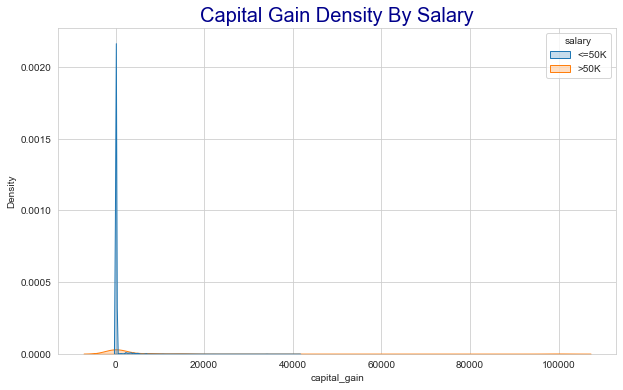

In [51]:
# Checking Density Distribution of the "capital_gain" feature by Salary 

sns.kdeplot(data=df, x="capital_gain", hue="salary", fill=True)

plt.title("Capital Gain Density By Salary", fontsize=20, color='darkblue');

In [53]:
# Descriptive Statistics of "capital_gain" with respect to Salary levels


df.groupby("salary").capital_gain.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,148.885,963.558,0.000,0.000,0.000,0.000,41310.000
>50K,7839.000,4007.165,14572.097,0.000,0.000,0.000,0.000,99999.000


In [54]:
# Descriptive Statistics of "capital_gain != 0" by Salary


df[df.capital_gain != 0].groupby("salary")["capital_gain"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,1035.000,3552.813,3173.419,114.000,2202.000,3273.000,4101.000,41310.000
>50K,1677.000,18731.165,26778.676,3103.000,7298.000,7896.000,15024.000,99999.000


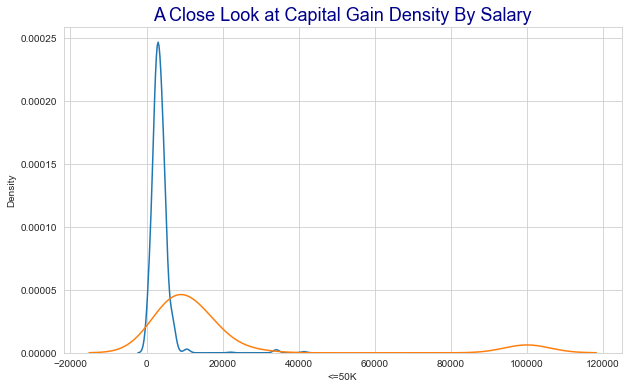

In [55]:
# Checking Density Distribution of "capital_gain" feature by Salary 

df[df.capital_gain != 0].groupby('salary')['capital_gain']\
                        .apply(lambda x: sns.kdeplot(x, label=x.name))

plt.title("A Close Look at Capital Gain Density By Salary", fontsize=18, color='darkblue');

capital_loss

In [56]:
df[df.capital_loss < 0]

# As seen, there has been no values lower than zero since it is contrary to the meaning of "Capital Loss"

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary


In [57]:
# Descriptive Statistics of the "capital_loss" by "workclass" & "occupation"


df.groupby(["workclass", "occupation"])["capital_loss"].describe()\
                             .style.apply(highlight_max, props='color: white; background-color: #33FFF9;', axis=0)\
                             .apply(highlight_max, props='color: white; background-color: pink;', axis=1)\
                             .apply(highlight_max, props='color: white; background-color: purple', axis=None)

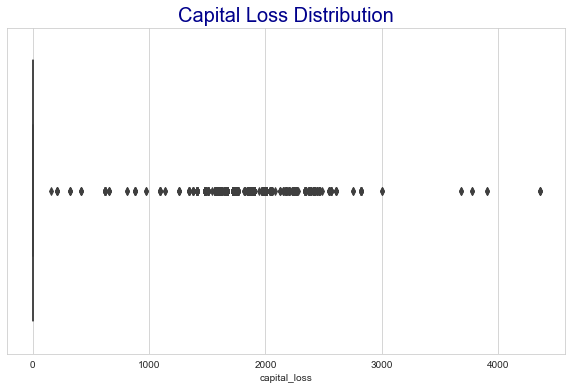

In [58]:
# Checking the extreme values in the "capital_loss" feature with box plot

sns.boxplot(data=df, x="capital_loss")

plt.title("Capital Loss Distribution", fontsize=20, color='darkblue');

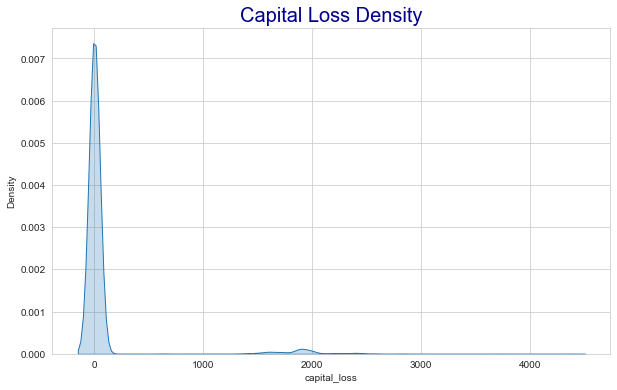

In [59]:
# Checking Density Distribution of the "capital_loss" feature 

sns.kdeplot(data=df, x="capital_loss", fill=True)

plt.title("Capital Loss Density", fontsize=20, color='darkblue');

In [60]:
# Descriptive Statistics of "capital_loss" Feature


df.capital_loss.describe()

count   32537.000
mean       87.368
std       403.102
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital_loss, dtype: float64

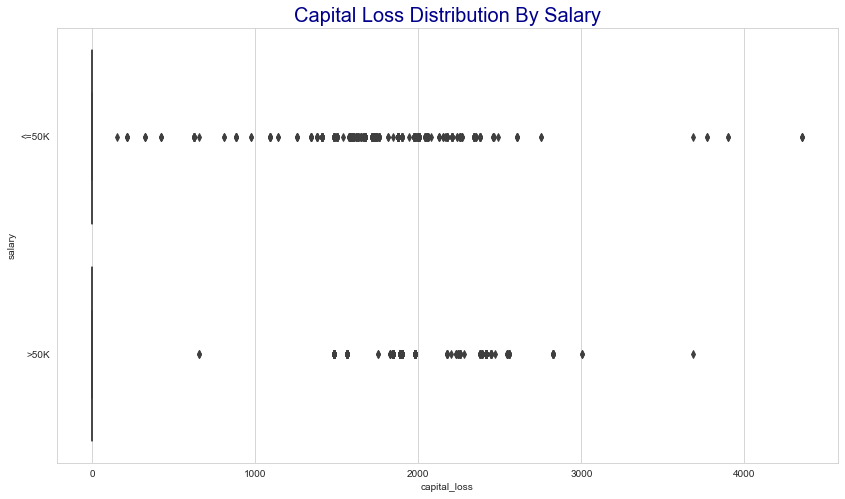

In [61]:
# Checking the extreme values in the "capital_loss" feature by Salary with box plot

plt.figure(figsize=(14, 8))

sns.boxplot(data=df, 
            y="salary", 
            x="capital_loss")

# # Adding in points to show each observation
# sns.stripplot(data=df,
#               y="salary", 
#               x="capital_loss",
#               size=4, 
#               color="purple", 
#               linewidth=0)

# # Tweaking the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)

plt.title("Capital Loss Distribution By Salary", fontsize=20, color='darkblue');

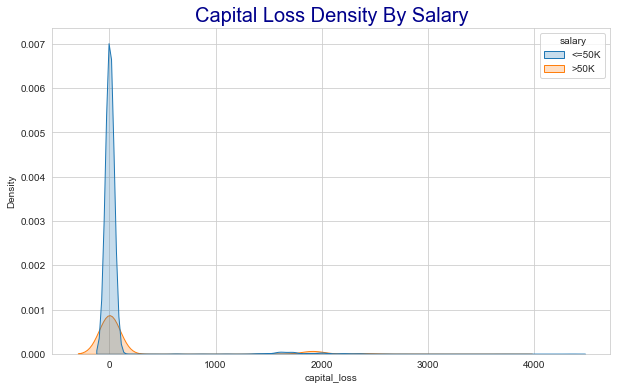

In [62]:
# Checking Density Distribution of the "capital_loss" feature by Salary 

sns.kdeplot(data=df, x="capital_loss", hue="salary", fill=True)

plt.title("Capital Loss Density By Salary", fontsize=20, color='darkblue');

In [64]:
# Descriptive Statistics of "capital_loss" by Salary


df.groupby("salary").capital_loss.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,53.190,310.890,0.000,0.000,0.000,0.000,4356.000
>50K,7839.000,195.051,595.555,0.000,0.000,0.000,0.000,3683.000


In [65]:
# Descriptive Statistics of "capital_loss != 0" by Salary


df[df.capital_loss != 0].groupby("salary").capital_loss.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,746.000,1760.983,438.906,155.000,1590.000,1721.000,1980.000,4356.000
>50K,773.000,1978.017,264.144,653.000,1887.000,1902.000,1977.000,3683.000


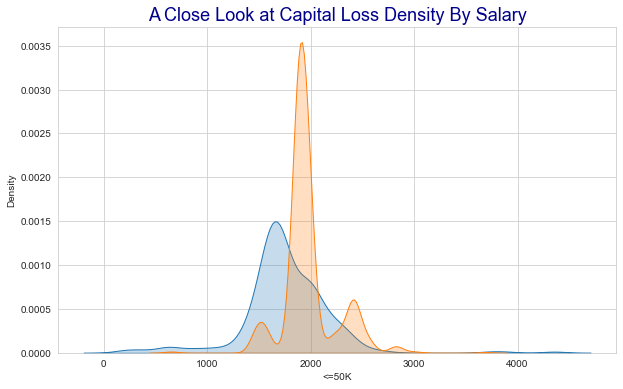

In [66]:
# Checking Density Distribution of the "capital_loss != 0" by Salary 

df[df.capital_loss != 0].groupby('salary')['capital_loss']\
                        .apply(lambda x: sns.kdeplot(x, label=x.name, fill=True))

plt.title("A Close Look at Capital Loss Density By Salary", fontsize=18, color='darkblue');

hours_per_week

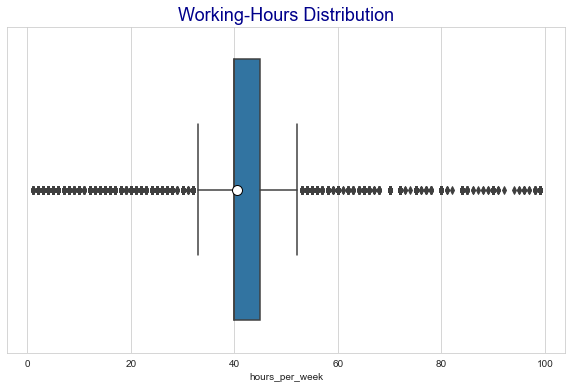

In [67]:
# Checking the extreme values in the "hours_per_week" feature with box plot

sns.boxplot(data=df, 
            x="hours_per_week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Working-Hours Distribution", fontsize=18, color='darkblue');

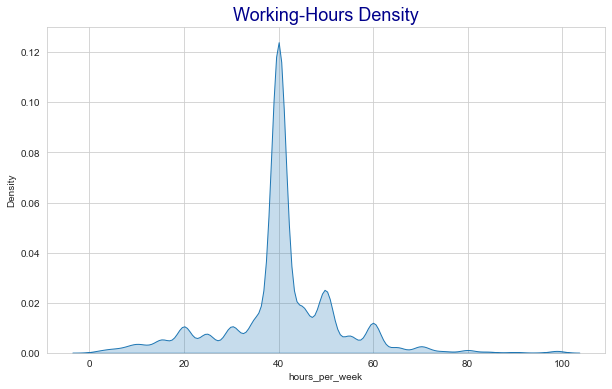

In [68]:
# Checking Density Distribution of the "hours_per_week" Feature 

sns.kdeplot(data=df, x="hours_per_week", fill=True)

plt.title("Working-Hours Density", fontsize=18, color='darkblue');

In [70]:
# Descriptive Statistics of "hours_per_week" by Salary


df.hours_per_week.describe()

count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

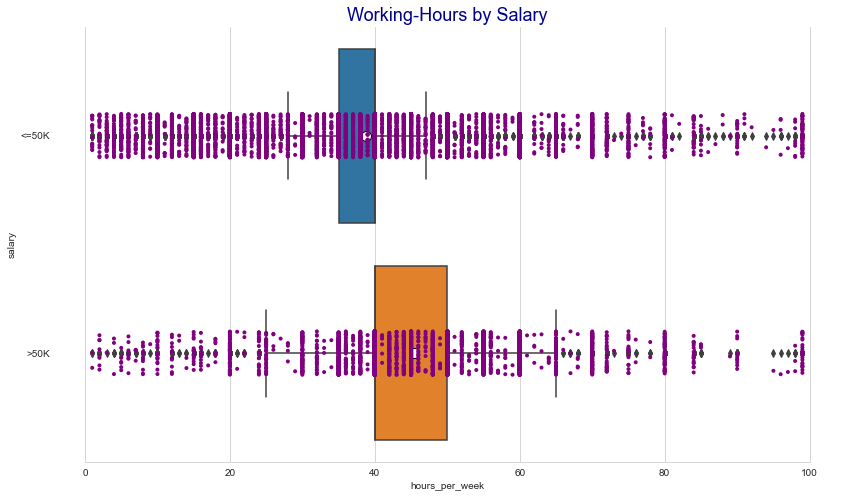

In [71]:
# Checking the extreme values in the "hours_per_week" by Salary with box plot

plt.figure(figsize=(14, 8))

sns.boxplot(data=df, 
            y="salary", 
            x="hours_per_week",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Adding in points to show each observation
sns.stripplot(data=df,
              y="salary", 
              x="hours_per_week",
              size=4, 
              color="purple", 
              linewidth=0)

# Tweaking the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title("Working-Hours by Salary", fontsize=18, color='darkblue');            

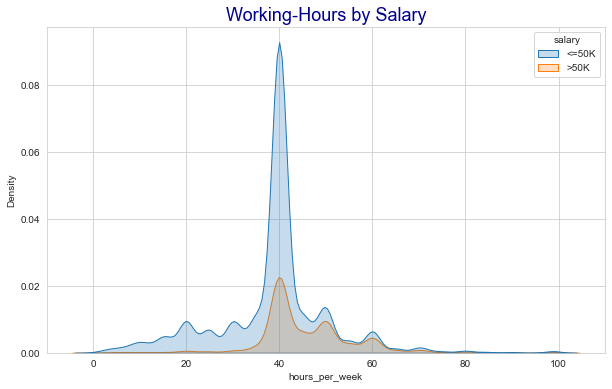

In [72]:
# Checking Density Distribution of the "hours_per_week" by Salary 

sns.kdeplot(data=df, x="hours_per_week", hue="salary", fill=True)

plt.title("Working-Hours by Salary", fontsize=18, color='darkblue');   

In [73]:
# Descriptive Statistics of "hours_per_week" by Salary


df.groupby("salary").hours_per_week.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,38.843,12.318,1.000,35.000,40.000,40.000,99.000
>50K,7839.000,45.473,11.014,1.000,40.000,40.000,50.000,99.000


education & education_num

In [74]:
# Checking the uniques of "education" feature and determining their numbers

df.education.value_counts(dropna=False)

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [75]:
# Checking the uniques of "education_num" feature and determining their numbers 

df.education_num.value_counts(dropna=False)

9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: education_num, dtype: int64

In [76]:
# Comparing the uniques of "education" with those of "education_num"

df.groupby('education').education_num.value_counts(dropna=False)

education     education_num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              159
              NaN                  7
5th-6th       3.000              329
              NaN                  3
7th-8th       4.000              630
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5245
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10208
              NaN                286
Masters       14.000            1686
              NaN                 36
Preschool 

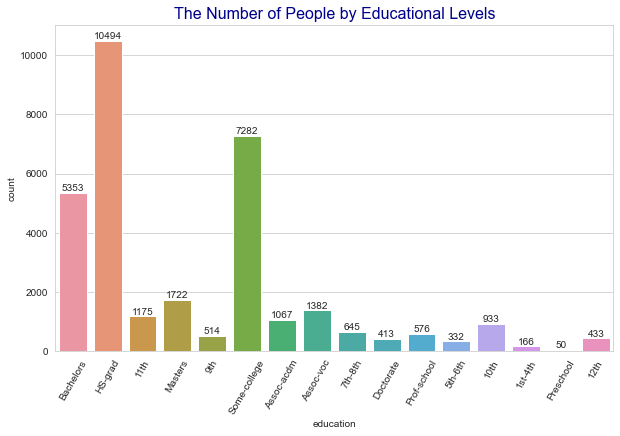

In [77]:
# Visualization of "education" feature

ax = sns.countplot(data=df, x="education")

plt.xticks(rotation=60)

plt.title("The Number of People by Educational Levels", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

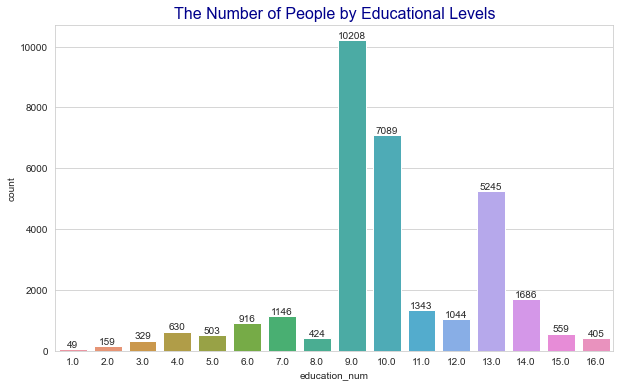

In [78]:
# Visualization of "education_num" feature

ax = sns.countplot(data=df, x="education_num")

plt.title("The Number of People by Educational Levels", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

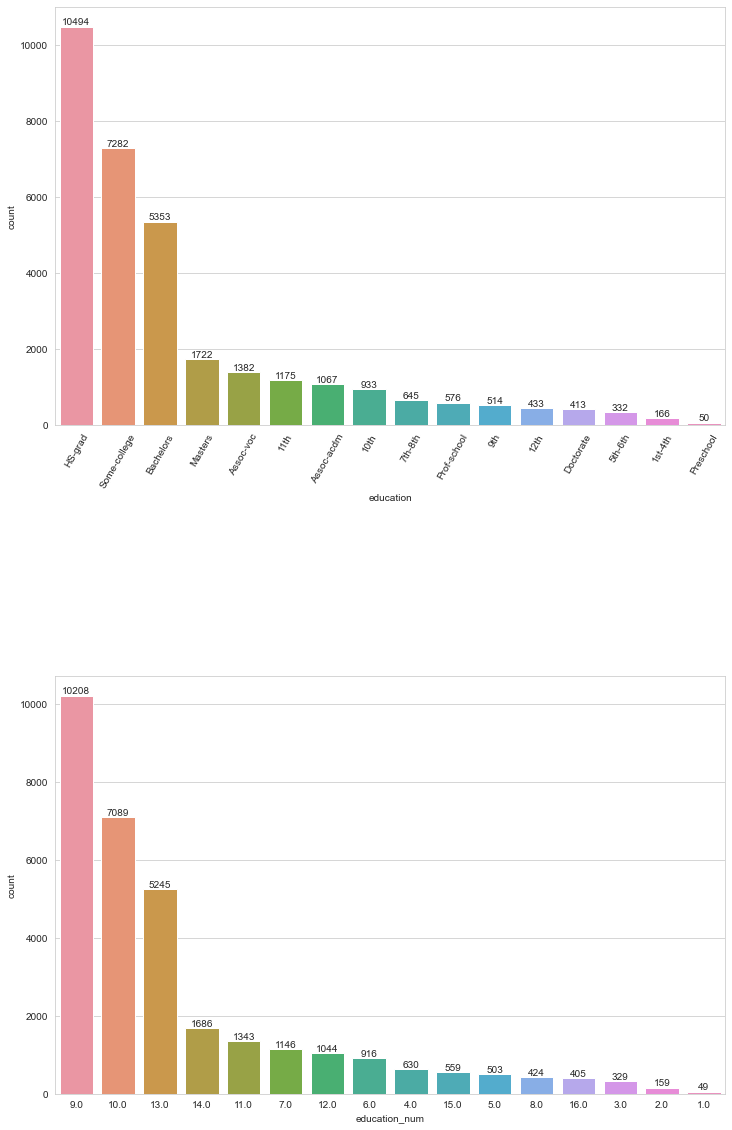

In [79]:
# Visualization of "education" and "education_num" features by order

education_count = df["education"].value_counts().index
education_num_count = df["education_num"].value_counts().index

fig, ax = plt.subplots(2, 1, figsize=(12, 20))

sns.countplot(df["education"], order=education_count, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container);

sns.countplot(df["education_num"], order=education_num_count, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container);

ax[0].tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.6);

The pattern of the counts in both features are almost equivalent. It is realized that "9.0" represent "HS-Grad", "10.0" represents "Some-college", "1.0" represents "Preschool" and so on. There are slight differences between the counts. It might be caused by the human errors during the survey.

In [80]:
# Checking "education" feature by Salary in detail 

df.groupby("education").salary.value_counts()

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

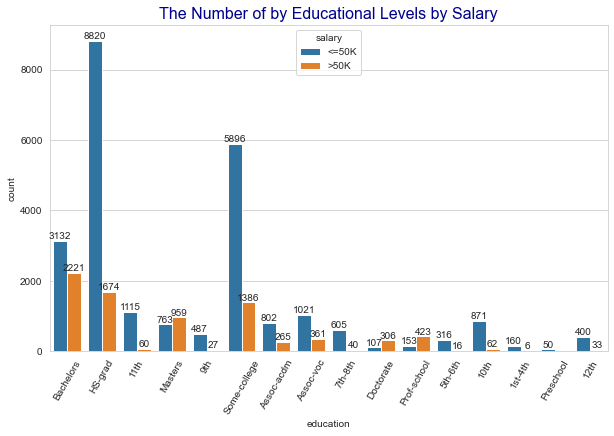

In [81]:
# Visualizing the number of people in each "education" level by Salary

ax = sns.countplot(data=df, x="education", hue="salary")

plt.title("The Number of by Educational Levels by Salary", fontsize=16, color="darkblue")

plt.xticks(rotation = 60)

for container in ax.containers:
    ax.bar_label(container);

In [82]:
# Checking "education_num" feature by Salary in detail 

df.groupby("education_num").salary.value_counts()

education_num  salary
1.000          <=50K       49
2.000          <=50K      153
               >50K         6
3.000          <=50K      313
               >50K        16
4.000          <=50K      592
               >50K        38
5.000          <=50K      477
               >50K        26
6.000          <=50K      854
               >50K        62
7.000          <=50K     1088
               >50K        58
8.000          <=50K      391
               >50K        33
9.000          <=50K     8579
               >50K      1629
10.000         <=50K     5746
               >50K      1343
11.000         <=50K      994
               >50K       349
12.000         <=50K      787
               >50K       257
13.000         <=50K     3078
               >50K      2167
14.000         >50K       935
               <=50K      751
15.000         >50K       410
               <=50K      149
16.000         >50K       302
               <=50K      103
Name: salary, dtype: int64

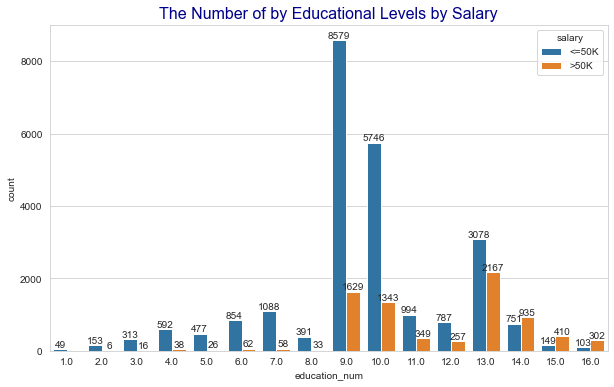

In [83]:
# Visualizing the number of people in each "education_num" level by Salary

ax = sns.countplot(data=df, 
                   x="education_num", 
                   hue="salary")

plt.title("The Number of by Educational Levels by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

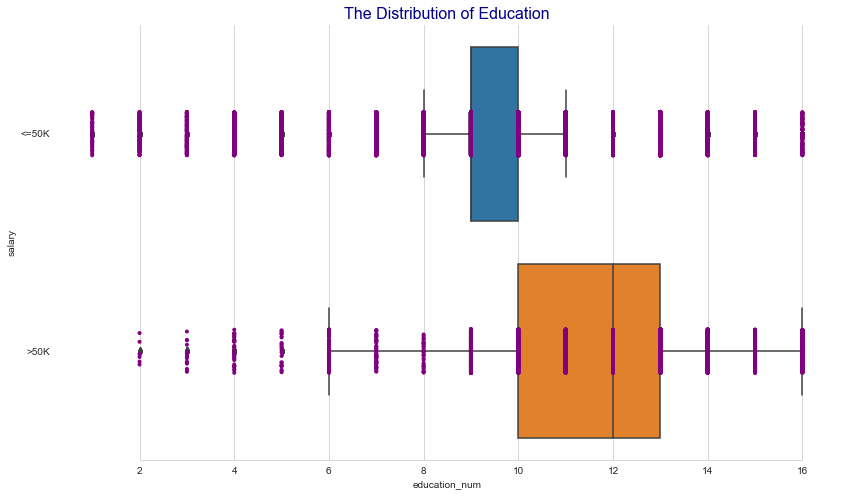

In [84]:
# Checking the extreme values in the "education_num" by Salary with box plot

plt.figure(figsize=(14, 8))

sns.boxplot(data=df, 
            y="salary", 
            x="education_num")

# Adding in points to show each observation
sns.stripplot(data=df,
              y="salary", 
              x="education_num",
              size=4, 
              color="purple", 
              linewidth=0)

# Tweaking the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

plt.title("The Distribution of Education", fontsize=16, color="darkblue");

By means of "Feature Engineering", decreasing the number of categories in "education" feature as "elementary_primary_school_degree", "middle_secondary school_degree", and "high_level_degree" and creating a new feature with this new categorical data would be helpful to interpret the data.

In [85]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th"]:
        return "elementary_primary_school_degree"
    elif x in ["7th-8th", "9th", "10th", "11th", "12th", "HS-grad"]:
        return "middle_secondary school_degree"
    elif x in ["Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_degree"

In [86]:
df.education.apply(mapping_education).value_counts(dropna=False)

high_level_degree                   17795
middle_secondary school_degree      14194
elementary_primary_school_degree      548
Name: education, dtype: int64

In [87]:
df["education_summary"] = df.education.apply(mapping_education)

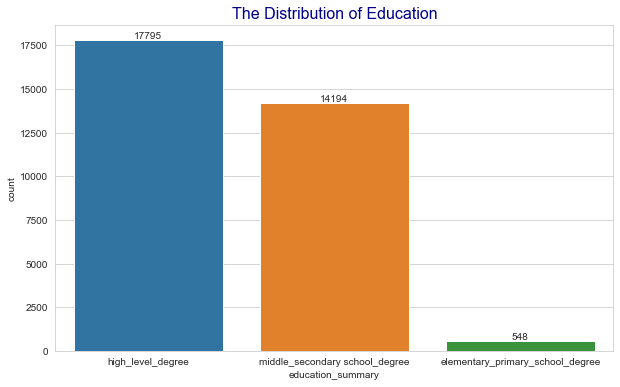

In [88]:
# Visualizing the number of persons in each sub-categories of "education_summary" (high, medium, low)

ax = sns.countplot(data=df, x="education_summary")

plt.title("The Distribution of Education", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

In [89]:
# The number of persons in each "education_summary" levels by Salary (high, medium, low)

df.groupby("education_summary").salary.value_counts()

education_summary                 salary
elementary_primary_school_degree  <=50K       526
                                  >50K         22
high_level_degree                 <=50K     11874
                                  >50K       5921
middle_secondary school_degree    <=50K     12298
                                  >50K       1896
Name: salary, dtype: int64

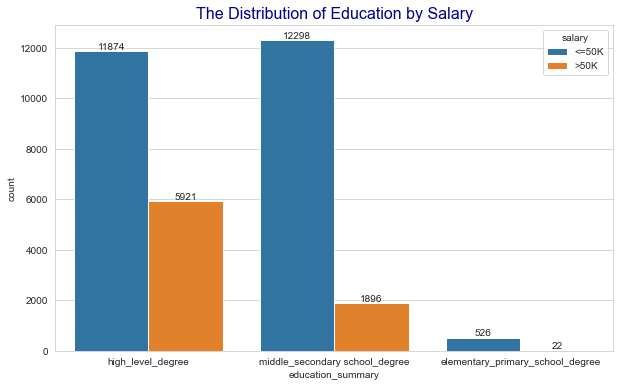

In [90]:
# Visualizing the number of persons in each sub-categories of "education_summary" (high, medium, low) by Salary

ax = sns.countplot(data=df, x="education_summary", hue="salary")

plt.title("The Distribution of Education by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

In [91]:
# The Proportional Distribution of persons in each sub-categories of "education_summary" (high, medium, low) by Salary 

edu = df.groupby(["education_summary"]).salary.value_counts(normalize=True)
edu

education_summary                 salary
elementary_primary_school_degree  <=50K    0.960
                                  >50K     0.040
high_level_degree                 <=50K    0.667
                                  >50K     0.333
middle_secondary school_degree    <=50K    0.866
                                  >50K     0.134
Name: salary, dtype: float64

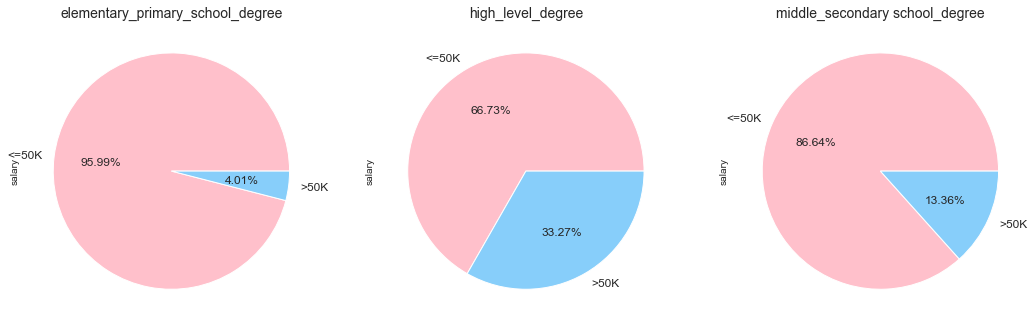

In [92]:
# Visualizing the percentages of "education_summary" levels by Salary

plt.figure(figsize=(18, 6))
index=1
for i in [0, 2, 4]:
    plt.subplot(1, 3, index)
    edu[i:i+2].plot.pie(subplots=True,
                        labels=["<=50K", ">50K"],
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue'],
                        )
    plt.title(edu.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [93]:
# The number of persons in each "salary" by "education_summary" levels (high, medium, low)

df.groupby("salary").education_summary.value_counts()

salary  education_summary               
<=50K   middle_secondary school_degree      12298
        high_level_degree                   11874
        elementary_primary_school_degree      526
>50K    high_level_degree                    5921
        middle_secondary school_degree       1896
        elementary_primary_school_degree       22
Name: education_summary, dtype: int64

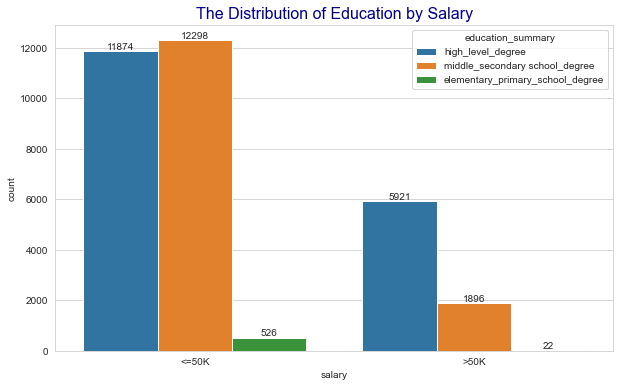

In [94]:
# Visualizing the number of persons in "salary" feature by "education_summary" (high, medium, low) 

ax = sns.countplot(data=df, x="salary", hue="education_summary")

plt.title("The Distribution of Education by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

In [95]:
# The proportion of persons in each "salary" by "education_summary" levels (high, medium, low)

edu = df.groupby(["salary"]).education_summary.value_counts(normalize=True)
edu

salary  education_summary               
<=50K   middle_secondary school_degree     0.498
        high_level_degree                  0.481
        elementary_primary_school_degree   0.021
>50K    high_level_degree                  0.755
        middle_secondary school_degree     0.242
        elementary_primary_school_degree   0.003
Name: education_summary, dtype: float64

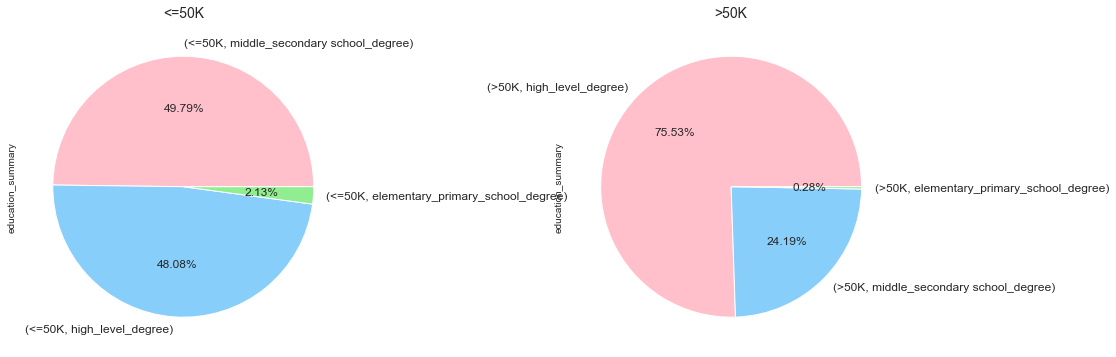

In [96]:
# Visualizing the percentages of persons in each "salary" group by Education levels (high, medium, low) 

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1, 2, index)
    edu[i:i+3].plot.pie(subplots=True,
#                        labels=["secondary education", "higher education", "primary education"],
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['pink', 'lightskyblue', 'lightgreen'],
                        )
    plt.title(edu.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [97]:
# Creating a dataframe demonstrating the percentages of education level by Salary 

edu_df = pd.DataFrame(edu)
edu_df.rename(columns={"education_summary": "percentage"}, inplace=True)
edu_df.reset_index(inplace=True)
edu_df.sort_values(by=["salary", "education_summary"], inplace=True)
edu_df

,salary,education_summary,percentage
2,<=50K,elementary_primary_school_degree,0.021
1,<=50K,high_level_degree,0.481
0,<=50K,middle_secondary school_degree,0.498
5,>50K,elementary_primary_school_degree,0.003
3,>50K,high_level_degree,0.755
4,>50K,middle_secondary school_degree,0.242


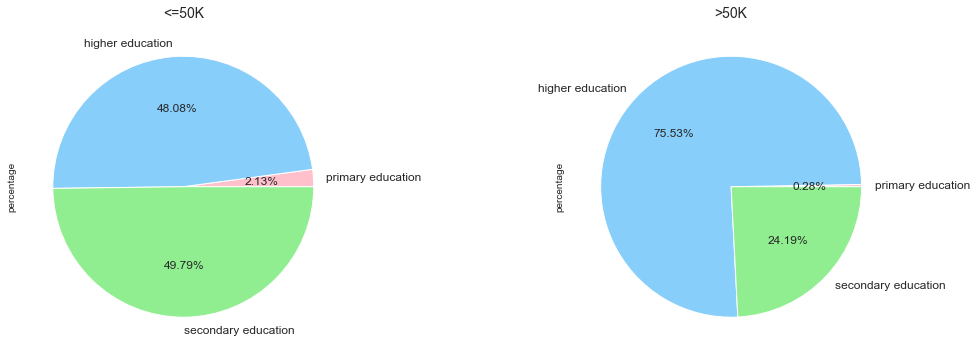

In [98]:
# Visualizing the percentages of persons in each "salary" group by Education levels (high, medium, low)

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 3]:
    plt.subplot(1, 2, index)
    edu_df["percentage"][i:i+3].plot.pie(subplots=True,
                                         labels=["primary education", "higher education", "secondary education"],
                                         autopct="%.2f%%",
                                         textprops={'fontsize': 12},
                                         colors=['pink', 'lightskyblue', 'lightgreen'],
                                         )
    plt.title(edu_df.salary[i], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

Sum up, the majority of participants that earn more than 50K (75.53%) have high level of education. For those who make money 50K or less, the percentages of higher and secondary level of educational attainments are very close to each other, 48.08% and 49.79% respectively. Yet, educational attainment level for high income group is higher. It can be assumed that education and salary seem to be significantly related.

marital_status & relationship

In [99]:
# Checking the uniques of "marital_status" feature and determining their numbers

df.marital_status.value_counts(dropna=False)

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [100]:
# Checking the uniques of "relationship" feature and determining their numbers

df.relationship.value_counts(dropna=False)

Husband           13187
Not-in-family      8292
NaN                5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [101]:
# Filling the missing values with "Unknown" in the column of "relationship"

df.relationship.fillna("Unknown", inplace=True)

In [102]:
# Checking the uniques of "relationship" and "marital_status" features and determining their numbers

df.groupby("relationship").marital_status.value_counts(dropna=False)

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

These features have almost same info, but "relationship" feature has %15 of missing values. So I have decided to go my way with "marital_status" feature

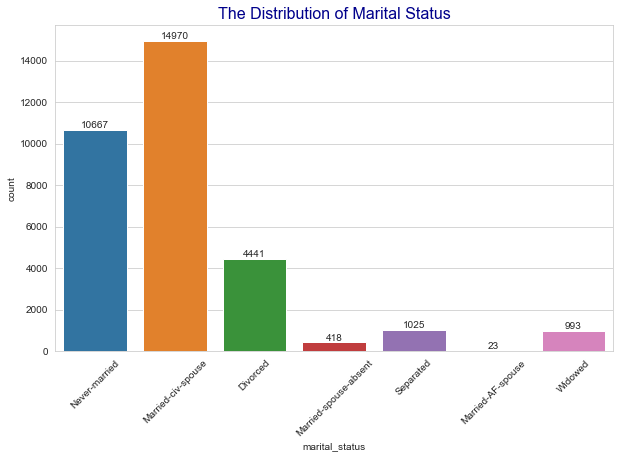

In [103]:
# Visualizing the number of persons in "marital_status" feature

ax = sns.countplot(data=df, x="marital_status")

plt.title("The Distribution of Marital Status", fontsize=16, color="darkblue")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

In [104]:
# Checking the uniques of "marital_status" and "relationship" features and determining their numbers

df.groupby("marital_status").salary.value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

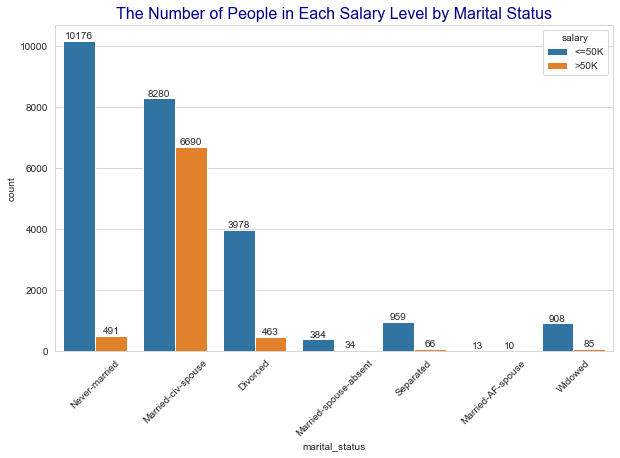

In [105]:
# Visualizing the number of "marital_status" by "relationship" 

ax = sns.countplot(data=df, x="marital_status", hue="salary")

plt.title("The Number of People in Each Salary Level by Marital Status", fontsize=16, color="darkblue")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container);

The number of categories in "marital_status" feature will be re-organized as married and unmarried

In [106]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "single"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [107]:
df.marital_status.apply(mapping_marital_status).value_counts(dropna=False)

single     17126
married    15411
Name: marital_status, dtype: int64

In [108]:
df["marital_status_summary"] = df.marital_status.apply(mapping_marital_status)

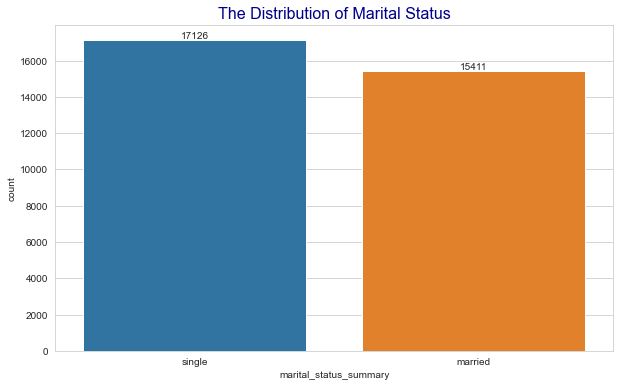

In [109]:
# Visualizing the number of persons in each sub-categories of "marital_status_summary" (single, married) 

ax = sns.countplot(data=df, x="marital_status_summary")

plt.title("The Distribution of Marital Status", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

In [110]:
# Checking the number of persons in each sub-categories of "marital_status_summary" (single, married) by Salary

df.groupby("marital_status_summary").salary.value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
single                  <=50K     16021
                        >50K       1105
Name: salary, dtype: int64

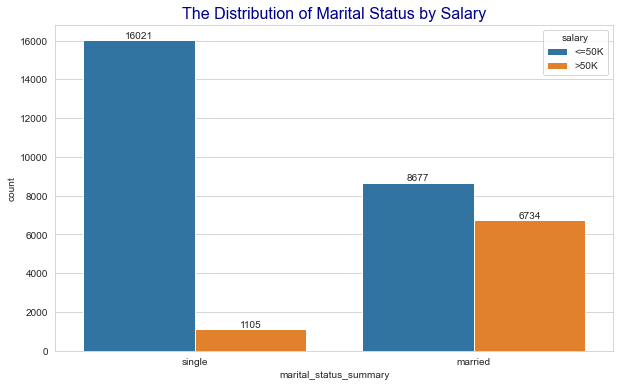

In [111]:
# Visualizing the number of persons in each sub-categories of "marital_status_summary" (single, married) by Salary

ax = sns.countplot(data=df, x="marital_status_summary", hue="salary")

plt.title("The Distribution of Marital Status by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

In [112]:
# Checking the proportion of persons in each "marital_status_summary" by "salary" levels (<=50K, >50K)

marital = df.groupby(["marital_status_summary"]).salary.value_counts(normalize=True)
marital

marital_status_summary  salary
married                 <=50K    0.563
                        >50K     0.437
single                  <=50K    0.935
                        >50K     0.065
Name: salary, dtype: float64

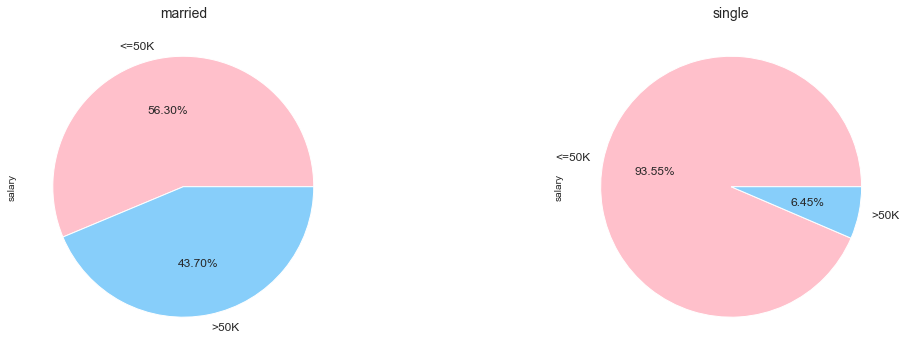

In [113]:
# Visualizing the percentages of persons in each "marital_status_summary" group by "salary" levels (<=50K, >50K)

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2,index)
    marital[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(marital.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [114]:
# Checking the number of persons in each sub-categories of Salary by "marital_status_summary" levels (single, married) 

df.groupby("salary").marital_status_summary.value_counts()

salary  marital_status_summary
<=50K   single                    16021
        married                    8677
>50K    married                    6734
        single                     1105
Name: marital_status_summary, dtype: int64

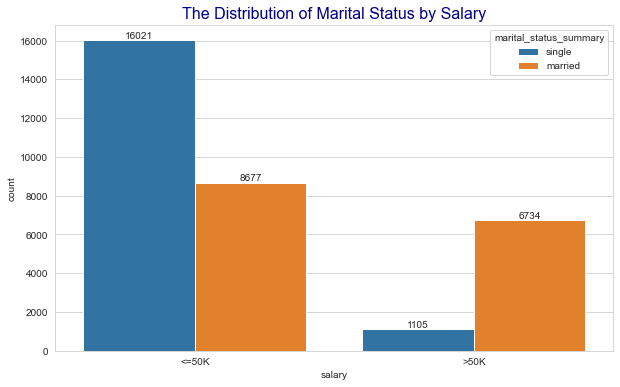

In [115]:
# Visualizing the number of persons in each sub-categories of Salary by "marital_status_summary" (single, married)

ax = sns.countplot(data=df, x="salary", hue="marital_status_summary")

plt.title("The Distribution of Marital Status by Salary", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

In [116]:
# Checking the proportion of persons in each "salary" levels (<=50K, >50K) by "marital_status_summary" (single, married)

marital = df.groupby("salary").marital_status_summary.value_counts(normalize=True)
marital

salary  marital_status_summary
<=50K   single                   0.649
        married                  0.351
>50K    married                  0.859
        single                   0.141
Name: marital_status_summary, dtype: float64

In [117]:
# Creating a dataframe demonstrating the proportions at Salary by "marital_status_summary" levels (single, married) 

marital_df = pd.DataFrame(marital)
marital_df.rename(columns={"marital_status_summary" : "percentage"}, inplace=True)
marital_df.reset_index(inplace=True)
marital_df.sort_values(by=["salary", "marital_status_summary"], inplace=True)
marital_df

,salary,marital_status_summary,percentage
1,<=50K,married,0.351
0,<=50K,single,0.649
2,>50K,married,0.859
3,>50K,single,0.141


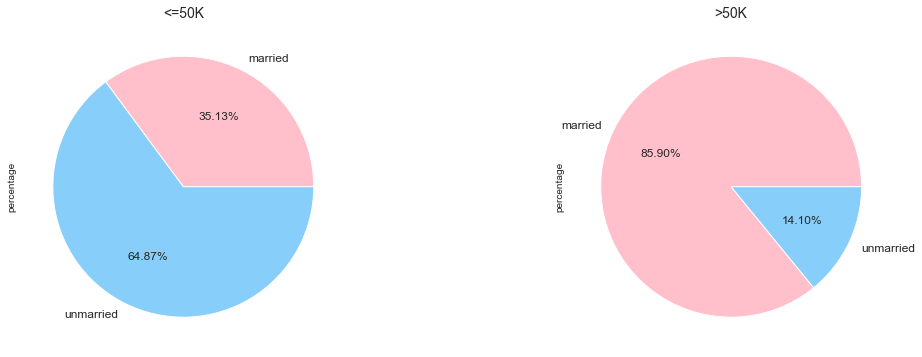

In [118]:
# Visualizing the percentages of persons in each "salary" levels (<=50K, >50K) by "marital_status_summary" levels (single, married) 

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1,2,index)
    marital_df["percentage"][i:i+2].plot.pie(subplots=True,
                                             labels=["married", "unmarried"],
                                             autopct="%.2f%%",
                                             textprops={'fontsize': 12},
                                             colors=['pink', 'lightskyblue'],
                                             )
    plt.title(marital_df.salary[i], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

It can easily be stated that married persons have earned more income than single persons. Majority of the group (85.9%) that make more money than 50K are married. Marital status seem to be associated with the income of individuals.

workclass

In [120]:
# Checking the counts of unique values in "workclass" feature

df.workclass.value_counts(dropna=False)

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

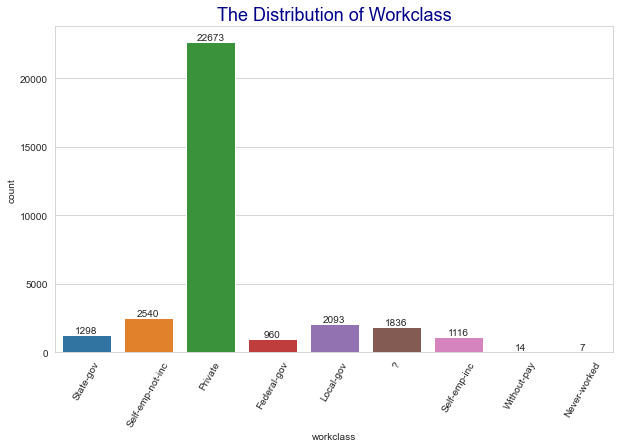

In [121]:
# Visualizing the number of people in each category of "workclass"

ax = sns.countplot(data=df, x="workclass")

plt.title("The Distribution of Workclass", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

In [122]:
# Replacing "?" values with "Unknown"

df.workclass.replace("?", "Unknown", inplace=True)

In [123]:
# Checking the number of persons in each sub-categories of "workclass" by "salary" levels  

df.groupby("workclass").salary.value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: salary, dtype: int64

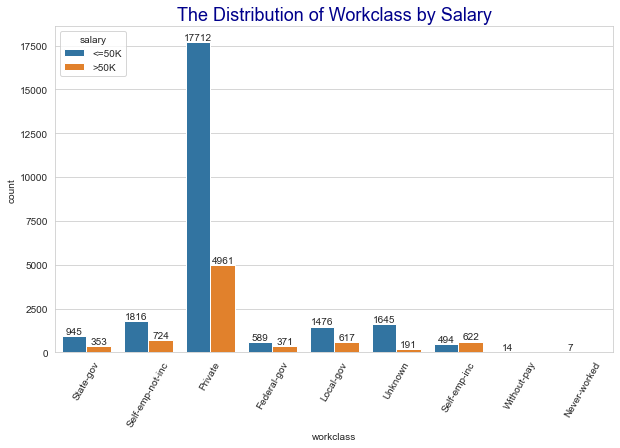

In [124]:
# Visualizing the number of "workclass" by Salary 

ax = sns.countplot(data = df, x="workclass", hue="salary")

plt.title("The Distribution of Workclass by Salary", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

In [125]:
# The proportion of persons in each "workclass" levels by "salary" (<=50K, >50K)

workclass = df.groupby("workclass").salary.value_counts(normalize=True)
workclass

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: salary, dtype: float64

In [126]:
# Creating a dataframe demonstrating the proportions at "workclass" by "salary" levels 

workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns={"salary": "percentage"}, inplace=True)
workclass_df.reset_index(inplace=True)
workclass_df.sort_values(by=["workclass", "salary"], inplace=True)
workclass_df

,workclass,salary,percentage
0,Federal-gov,<=50K,0.614
1,Federal-gov,>50K,0.386
2,Local-gov,<=50K,0.705
3,Local-gov,>50K,0.295
4,Never-worked,<=50K,1.000
5,Private,<=50K,0.781
6,Private,>50K,0.219
8,Self-emp-inc,<=50K,0.443
7,Self-emp-inc,>50K,0.557
9,Self-emp-not-inc,<=50K,0.715


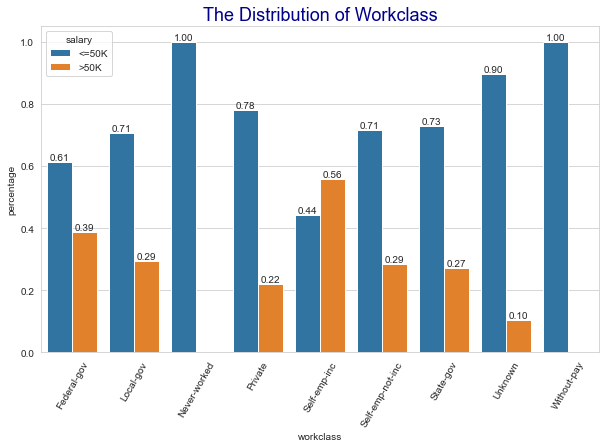

In [127]:
# Visualizing the number of persons in each sub-categories of "workclass" by "salary" 

fig, ax = plt.subplots()

ax = sns.barplot(data=workclass_df, x="workclass", y="percentage", hue="salary")

plt.title("The Distribution of Workclass", fontsize=18, color="darkblue")
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f");

In [128]:
# Checking the number of persons in each sub-categories of "salary" by "workclass" levels 

df.groupby("salary").workclass.value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: workclass, dtype: int64

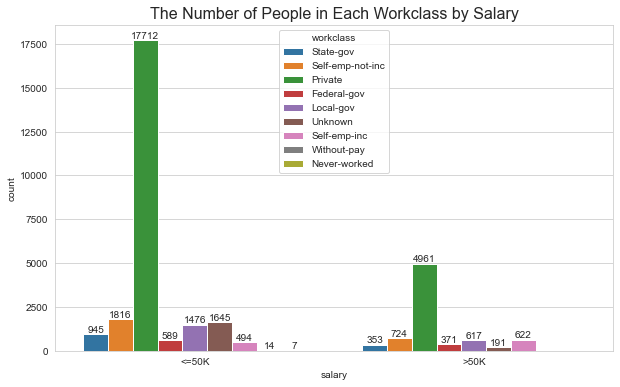

In [129]:
# Visualizing the number of persons in each sub-categories of "salary" by "workclass" levels 

ax = sns.countplot(data=df, x="salary", hue="workclass")

plt.title("The Number of People in Each Workclass by Salary", fontsize=16)
for container in ax.containers:
    ax.bar_label(container);

In [130]:
# The proportion of persons in each sub-categories of "salary" by "workclass" levels 

workclass = df.groupby("salary").workclass.value_counts(normalize=True)
workclass

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: workclass, dtype: float64

In [131]:
# Creating a dataframe demonstrating the proportions at "salary" by "workclass" levels 

workclass_df = pd.DataFrame(workclass)
workclass_df.rename(columns={"workclass": "percentage"}, inplace=True)
workclass_df.reset_index(inplace=True)
workclass_df.sort_values(by=["salary", "percentage"], ascending=False, inplace=True)
workclass_df

,salary,workclass,percentage
9,>50K,Private,0.633
10,>50K,Self-emp-not-inc,0.092
11,>50K,Self-emp-inc,0.079
12,>50K,Local-gov,0.079
13,>50K,Federal-gov,0.047
14,>50K,State-gov,0.045
15,>50K,Unknown,0.024
0,<=50K,Private,0.717
1,<=50K,Self-emp-not-inc,0.074
2,<=50K,Unknown,0.067


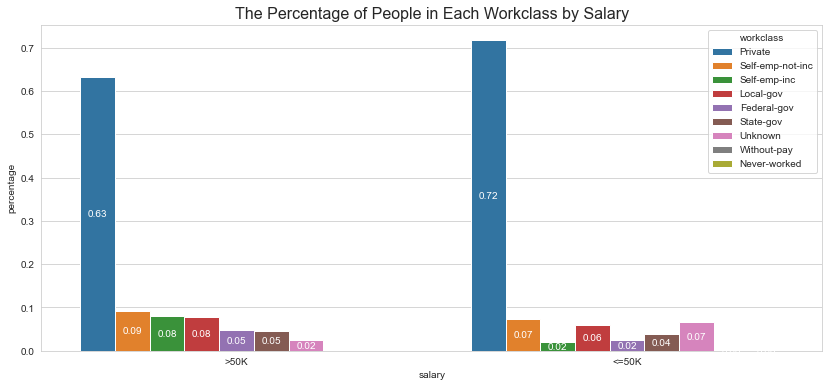

In [132]:
# Visualizing the proportion of persons in each sub-categories of "salary" by "workclass" levels  

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=workclass_df, x="salary", y="percentage", hue="workclass")

plt.title("The Percentage of People in Each Workclass by Salary", fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color="w");

 The share of Federal, state and local government workers and self-employed individuals are relatively higher for the category of income above 50K compared to their respective values for below 50K salary group.

occupation

In [133]:
# Checking the counts of unique values in "occupation" feature

df.occupation.value_counts(dropna=False)

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

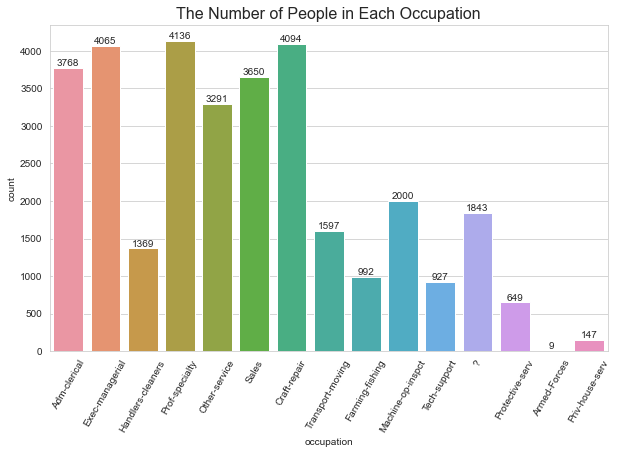

In [134]:
# Visualizing the number of people in each category of "occupation"

ax = sns.countplot(data=df, x="occupation")

plt.title("The Number of People in Each Occupation", fontsize=16)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container);

In [135]:
# Replacing "?" values with "Unknown"

df.occupation.replace("?", "Unknown", inplace=True)

In [136]:
# Checking the number of persons in each sub-categories of "occupation" by "salary" levels  

df.groupby("occupation").salary.value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

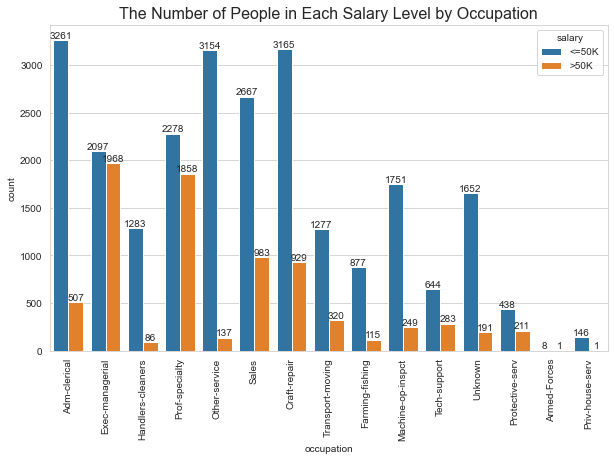

In [137]:
# Visualizing the number of "occupation" by Salary 

ax = sns.countplot(data=df, x="occupation", hue="salary")

plt.title("The Number of People in Each Salary Level by Occupation", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [138]:
# Checking the proportion of persons in each "salary" levels (<=50K, >50K) by "occupation" 

occupation = df.groupby("occupation").salary.value_counts(normalize=True)
occupation

occupation         salary
Adm-clerical       <=50K    0.865
                   >50K     0.135
Armed-Forces       <=50K    0.889
                   >50K     0.111
Craft-repair       <=50K    0.773
                   >50K     0.227
Exec-managerial    <=50K    0.516
                   >50K     0.484
Farming-fishing    <=50K    0.884
                   >50K     0.116
Handlers-cleaners  <=50K    0.937
                   >50K     0.063
Machine-op-inspct  <=50K    0.875
                   >50K     0.124
Other-service      <=50K    0.958
                   >50K     0.042
Priv-house-serv    <=50K    0.993
                   >50K     0.007
Prof-specialty     <=50K    0.551
                   >50K     0.449
Protective-serv    <=50K    0.675
                   >50K     0.325
Sales              <=50K    0.731
                   >50K     0.269
Tech-support       <=50K    0.695
                   >50K     0.305
Transport-moving   <=50K    0.800
                   >50K     0.200
Unknown            <=5

In [139]:
# Creating a dataframe demonstrating the proportions at "occupation" by "salary" levels 

occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns={"salary": "percentage"}, inplace=True)
occupation_df.reset_index(inplace=True)
occupation_df.sort_values(by=["occupation", "salary"], inplace=True)
occupation_df

,occupation,salary,percentage
0,Adm-clerical,<=50K,0.865
1,Adm-clerical,>50K,0.135
2,Armed-Forces,<=50K,0.889
3,Armed-Forces,>50K,0.111
4,Craft-repair,<=50K,0.773
5,Craft-repair,>50K,0.227
6,Exec-managerial,<=50K,0.516
7,Exec-managerial,>50K,0.484
8,Farming-fishing,<=50K,0.884
9,Farming-fishing,>50K,0.116


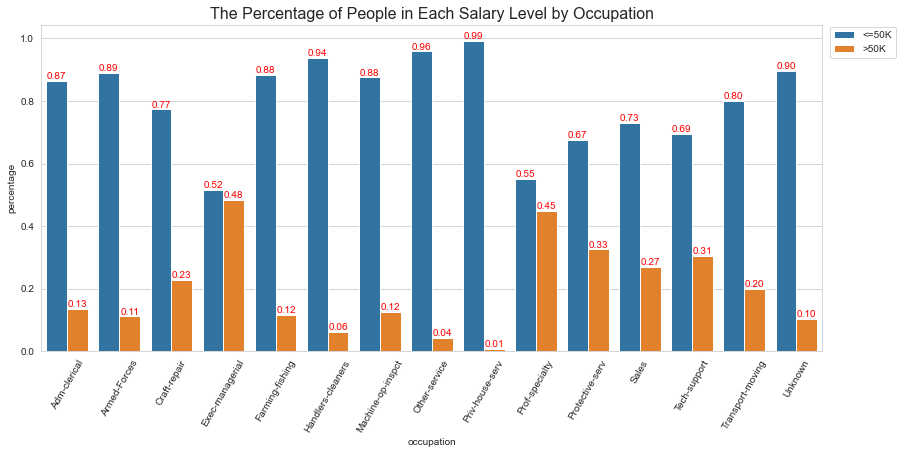

In [140]:
# Visualizing the number of persons in each sub-categories of "occupation" by "salary" 

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=occupation_df, x="occupation", y="percentage", hue="salary")

plt.title("The Percentage of People in Each Salary Level by Occupation", fontsize=16)
plt.xticks(rotation=60)
plt.legend(loc=(1.01, 0.9))

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', color="r");

In [141]:
# Checking the number of persons in each "salary" levels by "occupation" 

df.groupby("salary").occupation.value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

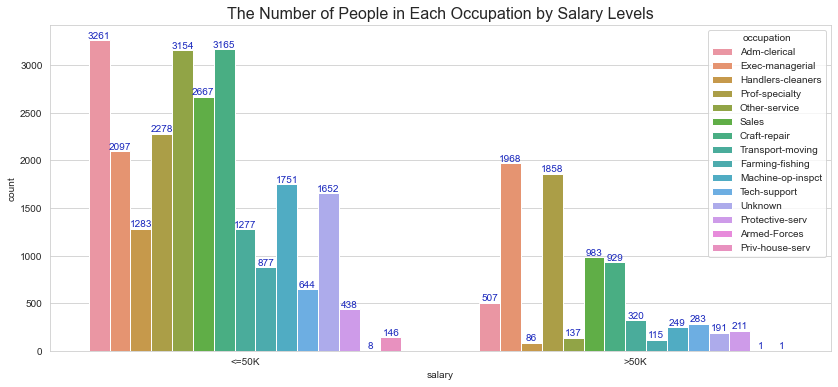

In [142]:
# Visualizing the number of persons in each "occupation" group by "salary" levels 

fig, ax = plt.subplots(figsize=(14, 6))

plt.title("The Number of People in Each Occupation by Salary Levels", fontsize=16);
ax = sns.countplot(data=df, x="salary", hue="occupation")

for container in ax.containers:
    ax.bar_label(container, color="#1927BD");

In [143]:
# Checking the percentage of persons in each "occupation" group by "salary" levels 

occupation = df.groupby("salary").occupation.value_counts(normalize=True)*100
occupation

salary  occupation       
<=50K   Adm-clerical        13.203
        Craft-repair        12.815
        Other-service       12.770
        Sales               10.798
        Prof-specialty       9.223
        Exec-managerial      8.491
        Machine-op-inspct    7.090
        Unknown              6.689
        Handlers-cleaners    5.195
        Transport-moving     5.170
        Farming-fishing      3.551
        Tech-support         2.607
        Protective-serv      1.773
        Priv-house-serv      0.591
        Armed-Forces         0.032
>50K    Exec-managerial     25.105
        Prof-specialty      23.702
        Sales               12.540
        Craft-repair        11.851
        Adm-clerical         6.468
        Transport-moving     4.082
        Tech-support         3.610
        Machine-op-inspct    3.176
        Protective-serv      2.692
        Unknown              2.437
        Other-service        1.748
        Farming-fishing      1.467
        Handlers-cleaners    

In [144]:
# Creating a dataframe demonstrating the percentages of people at "occupation" by "salary" levels 

occupation_df = pd.DataFrame(occupation)
occupation_df.rename(columns = {"occupation": "percentage"}, inplace=True)
occupation_df.reset_index(inplace=True)
occupation_df.sort_values(by=["salary", "occupation"], inplace=True)
occupation_df

,salary,occupation,percentage
0,<=50K,Adm-clerical,13.203
14,<=50K,Armed-Forces,0.032
1,<=50K,Craft-repair,12.815
5,<=50K,Exec-managerial,8.491
10,<=50K,Farming-fishing,3.551
8,<=50K,Handlers-cleaners,5.195
6,<=50K,Machine-op-inspct,7.090
2,<=50K,Other-service,12.770
13,<=50K,Priv-house-serv,0.591
4,<=50K,Prof-specialty,9.223


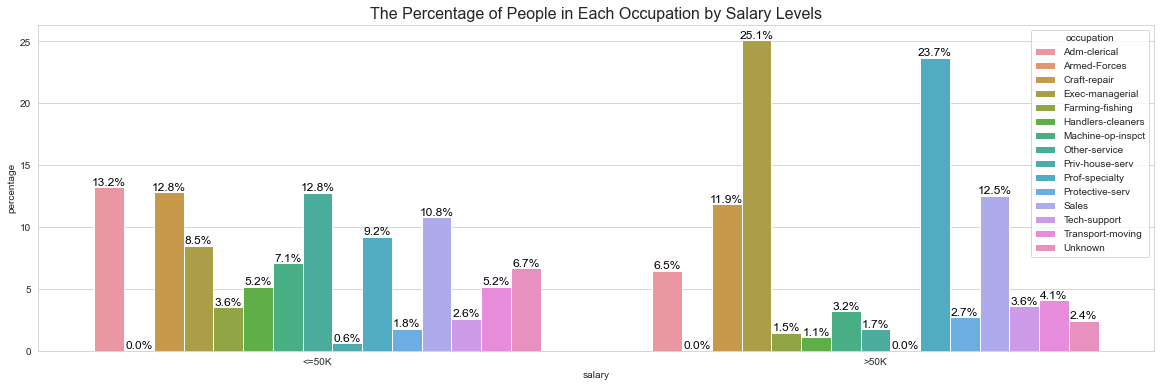

In [145]:
# Visualizing the percentage of persons at "occupation" by "salary" levels 

fig, ax = plt.subplots(figsize=(20, 6))

ax = sns.barplot(data=occupation_df, x="salary", y="percentage", hue="occupation")

plt.title("The Percentage of People in Each Occupation by Salary Levels", fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", color="#00010A", fontsize=12);

race

In [146]:
# Checking the counts of unique values in "race" feature

df.race.value_counts(dropna=False)

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

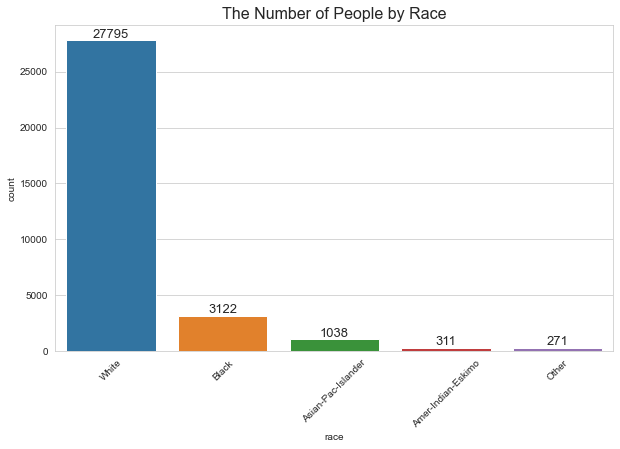

In [147]:
# Visualizing the number of people in each category of "race"

ax = sns.countplot(data=df, x="race")

plt.title("The Number of People by Race", fontsize=16)
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=13);

In [148]:
# Checking the number of persons in each sub-categories of "race" by "salary"   

df.groupby("race").salary.value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: salary, dtype: int64

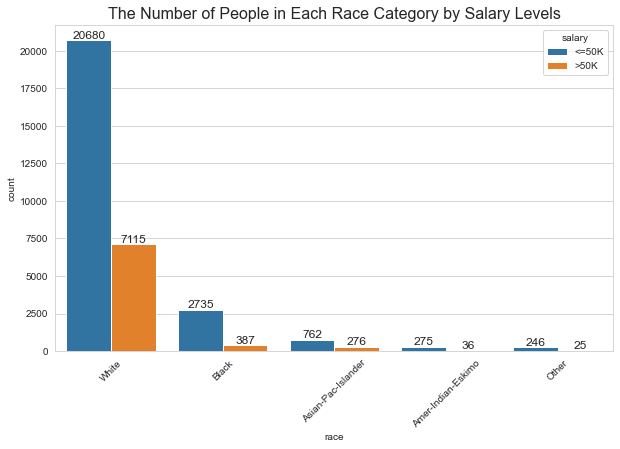

In [149]:
# Visualizing the number of people in each category of "salary" by "race"  

ax = sns.countplot(data=df, x="race", hue="salary")

plt.title("The Number of People in Each Race Category by Salary Levels", fontsize=16);
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [150]:
# Checking the proportion of people in each "race" group by "salary" levels

race = df.groupby("race").salary.value_counts(normalize=True)
race

race                salary
Amer-Indian-Eskimo  <=50K    0.884
                    >50K     0.116
Asian-Pac-Islander  <=50K    0.734
                    >50K     0.266
Black               <=50K    0.876
                    >50K     0.124
Other               <=50K    0.908
                    >50K     0.092
White               <=50K    0.744
                    >50K     0.256
Name: salary, dtype: float64

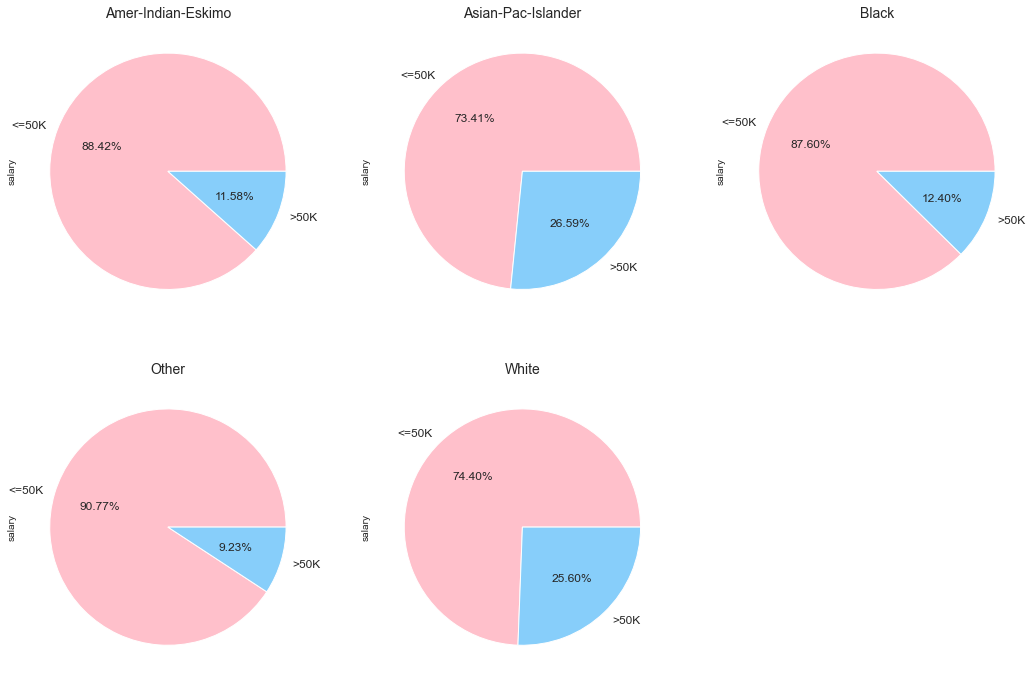

In [151]:
# Visualizing the percentage of people in each "race" group by "salary" levels

plt.figure(figsize = (18, 12))
index=1
for i in [0, 2, 4, 6, 8]:
    plt.subplot(2, 3, index)
    race[i:i+2].plot.pie(subplots=True,
                         labels=["<=50K", ">50K"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(race.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [152]:
# Checking the number of persons in each sub-categories of "race" by "salary" levels  

df.groupby("salary").race.value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

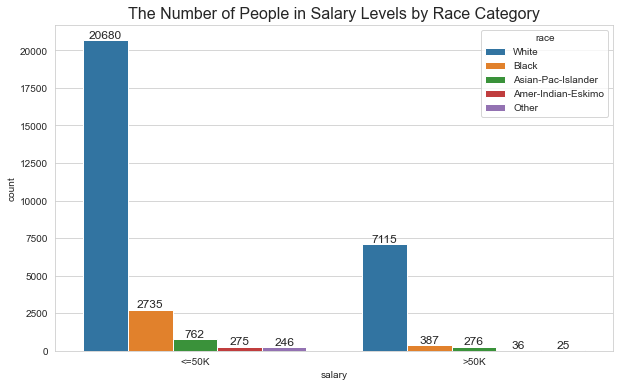

In [153]:
# Visualizing the number of persons in each sub-categories of "race" by "salary" levels  

ax = sns.countplot(data=df, x="salary", hue="race")

plt.title("The Number of People in Salary Levels by Race Category", fontsize=16);
for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [154]:
# Checking the percentage of persons at "race" by "salary" levels 

race = df.groupby("salary").race.value_counts(normalize=True)*100
race

salary  race              
<=50K   White                83.731
        Black                11.074
        Asian-Pac-Islander    3.085
        Amer-Indian-Eskimo    1.113
        Other                 0.996
>50K    White                90.764
        Black                 4.937
        Asian-Pac-Islander    3.521
        Amer-Indian-Eskimo    0.459
        Other                 0.319
Name: race, dtype: float64

In [155]:
# Creating a dataframe demonstrating the percentage of persons at "race" by "salary" levels 

race_df = pd.DataFrame(race)
race_df.rename(columns={"race": "percentage"}, inplace=True)
race_df.reset_index(inplace=True)
race_df.sort_values(by=["salary", "race"], inplace=True)
race_df

,salary,race,percentage
3,<=50K,Amer-Indian-Eskimo,1.113
2,<=50K,Asian-Pac-Islander,3.085
1,<=50K,Black,11.074
4,<=50K,Other,0.996
0,<=50K,White,83.731
8,>50K,Amer-Indian-Eskimo,0.459
7,>50K,Asian-Pac-Islander,3.521
6,>50K,Black,4.937
9,>50K,Other,0.319
5,>50K,White,90.764


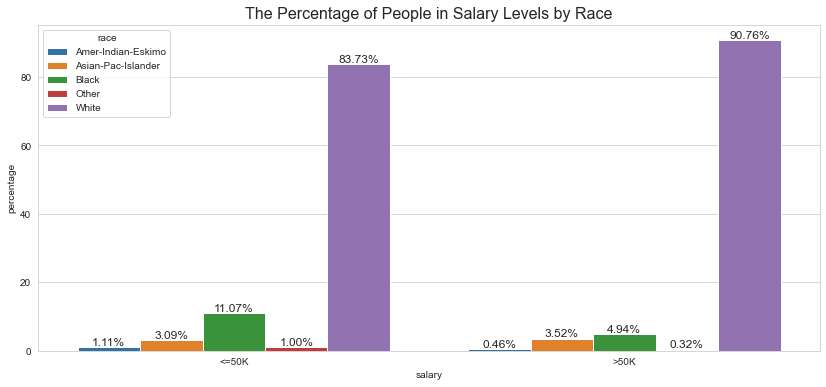

In [156]:
# Visualizing the percentage of persons at "race" by "salary" levels 

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=race_df, x="salary", y="percentage", hue="race")

plt.title("The Percentage of People in Salary Levels by Race", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=12);

gender

In [157]:
# Checking the counts of unique values in "gender" feature

df.gender.value_counts(dropna=False)

Male      21775
Female    10762
Name: gender, dtype: int64

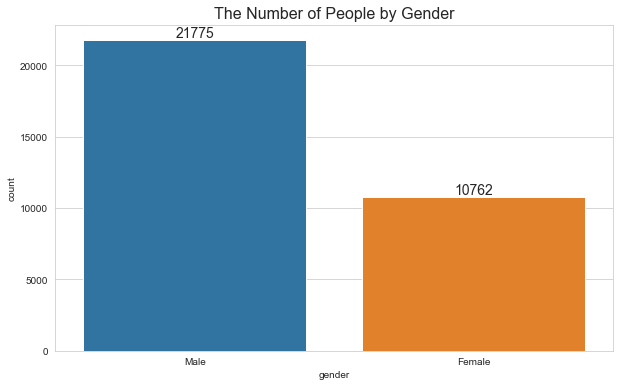

In [158]:
# Visualizing the number of people in each category of "gender"

ax = sns.countplot(data=df, x="gender")

plt.title("The Number of People by Gender", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=14);

In [159]:
# Checking the number of people in each sub-categories of "gender" by "salary" levels   

df.groupby("gender").salary.value_counts()

gender  salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: salary, dtype: int64

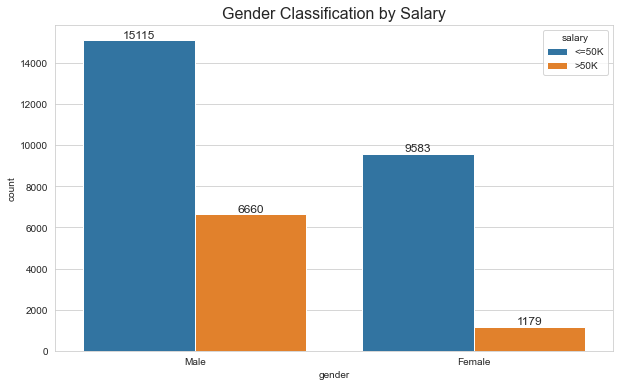

In [160]:
# Visualizing the number of people in each sub-categories of "gender" by "salary" levels  

ax = sns.countplot(data=df, x="gender", hue="salary")

plt.title("Gender Classification by Salary", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [161]:
# Checking the percentage of people in each "salary" level by "gender"  

gender = df.groupby("gender").salary.value_counts(normalize=True)*100
gender

gender  salary
Female  <=50K    89.045
        >50K     10.955
Male    <=50K    69.414
        >50K     30.586
Name: salary, dtype: float64

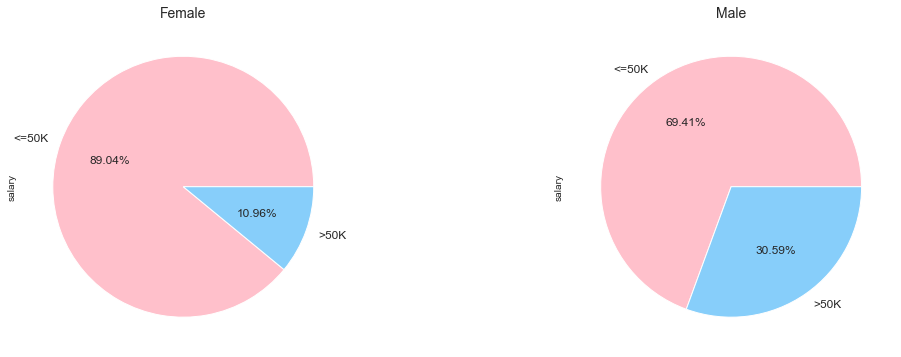

In [162]:
# Visualizing the percentage of people in each "salary" level by "gender"

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    gender[i:i+2].plot.pie(subplots=True,
                           labels=["<=50K", ">50K"],
                           autopct="%.2f%%",
                           textprops={'fontsize': 12},
                           colors=['pink', 'lightskyblue'],
                           )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [163]:
# Checking the number of people in each sub-categories of "gender" by "salary" levels  

df.groupby("salary").gender.value_counts()

salary  gender
<=50K   Male      15115
        Female     9583
>50K    Male       6660
        Female     1179
Name: gender, dtype: int64

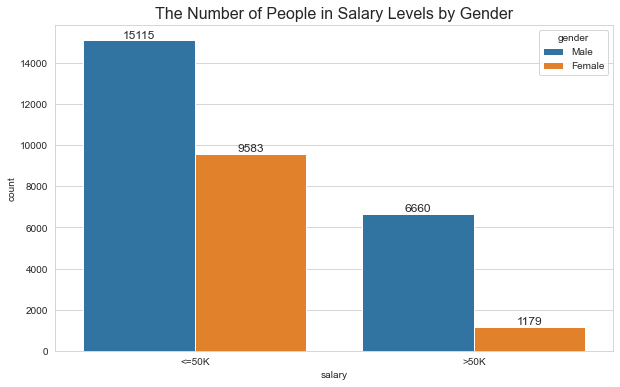

In [164]:
# Visualizing the number of persons in each sub-categories of "gender" by "salary" levels  

ax = sns.countplot(data=df, x="salary", hue="gender")

plt.title("The Number of People in Salary Levels by Gender", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [165]:
# Checking the percentage of persons at "gender" by "salary" levels 

gender = df.groupby("salary").gender.value_counts(normalize=True)*100
gender

salary  gender
<=50K   Male     61.199
        Female   38.801
>50K    Male     84.960
        Female   15.040
Name: gender, dtype: float64

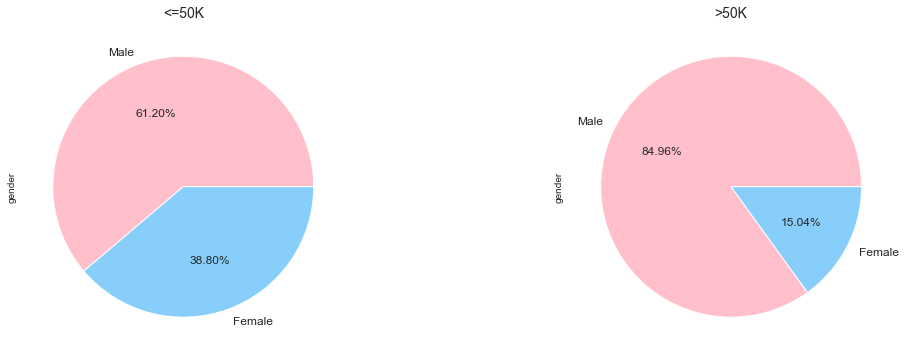

In [166]:
# Visualizing the percentage of persons at "gender" by "salary" levels 

plt.figure(figsize=(18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    gender[i:i+2].plot.pie(subplots=True,
                         labels=["Male", "Female"],
                         autopct="%.2f%%",
                         textprops={'fontsize': 12},
                         colors=['pink', 'lightskyblue'],
                         )
    plt.title(gender.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

native_country

In [167]:
# Checking the counts of unique values in "native_country" feature

df.native_country.value_counts(dropna=False)

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

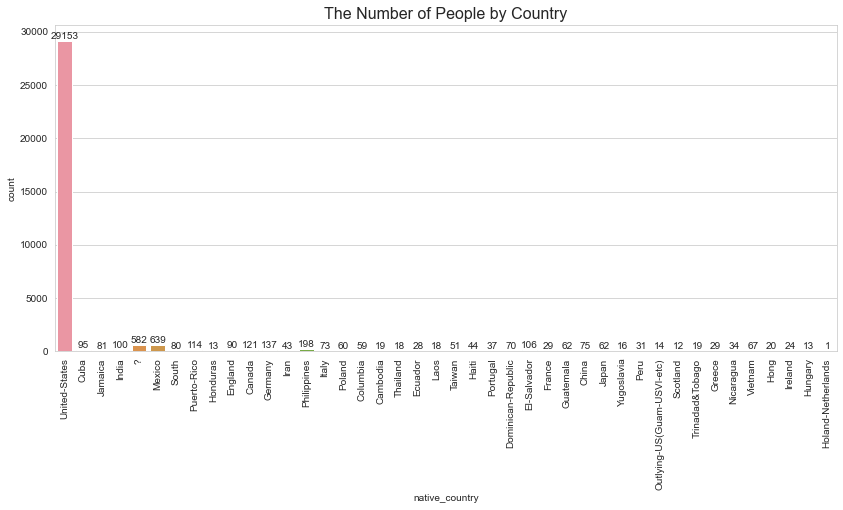

In [168]:
# Visualizing the number of people in each category of "native_country"

plt.figure(figsize=(14, 6))

ax = sns.countplot(data=df, x="native_country")

plt.title("The Number of People by Country", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [169]:
# Replacing "?" values with "Unknown"

df.native_country.replace("?", "Unknown", inplace=True)

In [170]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [171]:
# Decreasing the number of categories in "native_country" feature as "US", and "Others"   

df.native_country.apply(mapping_native_country).value_counts(dropna=False)

US        29153
Others     3384
Name: native_country, dtype: int64

In [172]:
# Creating a new feature named "native_country_summary"

df["native_country_summary"] = df.native_country.apply(mapping_native_country)
df["native_country_summary"]

0            US
1            US
2            US
3            US
4        Others
          ...  
32556        US
32557        US
32558        US
32559        US
32560        US
Name: native_country_summary, Length: 32537, dtype: object

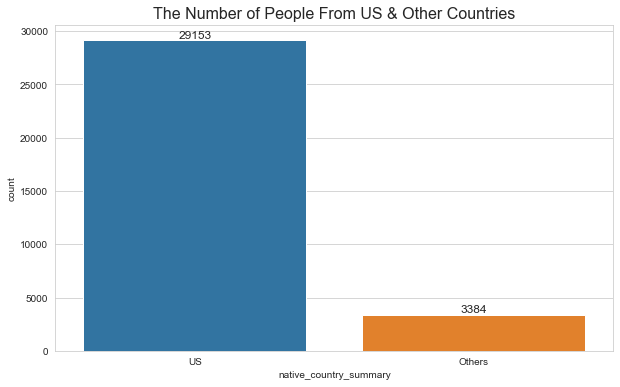

In [173]:
# Visualizing the number of people in each category of "native_country_summary"

ax = sns.countplot(data=df, x="native_country_summary")

plt.title("The Number of People From US & Other Countries", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [174]:
# Checking the number of persons in each sub-categories of "salary" by "native_country_summary"   

df.groupby("native_country_summary").salary.value_counts()

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: salary, dtype: int64

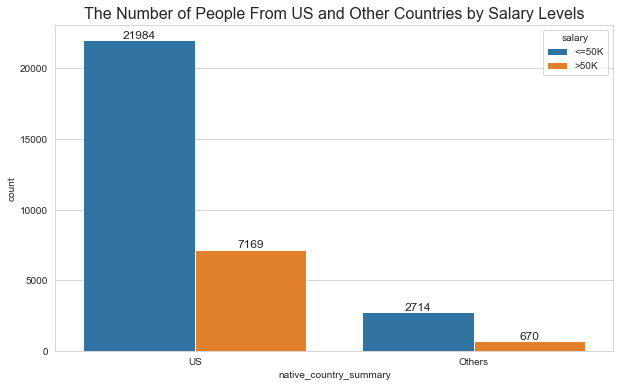

In [175]:
# Visualizing the number of persons in each sub-categories of "salary" by "native_country_summary"   

ax = sns.countplot(data=df, x="native_country_summary", hue="salary")

plt.title("The Number of People From US and Other Countries by Salary Levels", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [176]:
# Checking the percentage of persons in each "salary" levels by "native_country_summary" 

country = df.groupby(["native_country_summary"]).salary.value_counts(normalize=True)*100
country

native_country_summary  salary
Others                  <=50K    80.201
                        >50K     19.799
US                      <=50K    75.409
                        >50K     24.591
Name: salary, dtype: float64

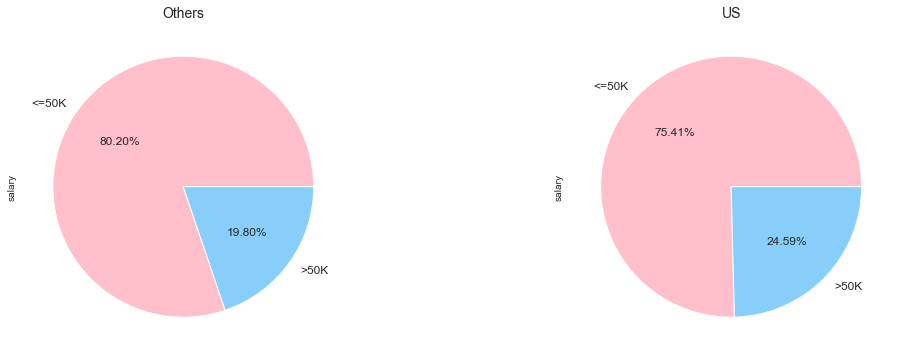

In [177]:
# Visualizing the percentage of persons in each "salary" levels by "native_country_summary" 

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["<=50K", ">50K"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

In [178]:
# Checking the number of persons in each sub-categories of "native_country_summary" by "salary" levels  

df.groupby("salary").native_country_summary.value_counts()

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: native_country_summary, dtype: int64

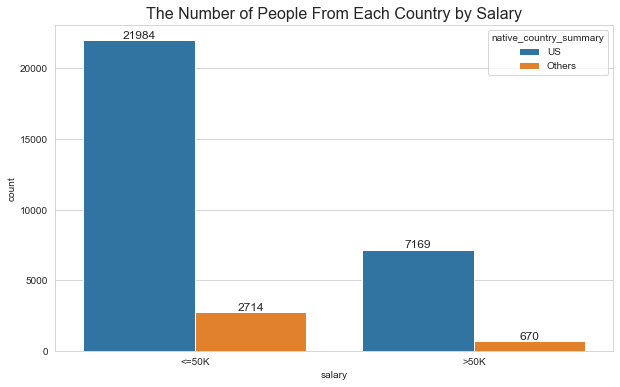

In [179]:
# Visualizing the number of persons in each sub-categories of "native_country_summary" by "salary" levels  

ax = sns.countplot(data=df, x="salary", hue="native_country_summary")

plt.title("The Number of People From Each Country by Salary", fontsize=16);

for container in ax.containers:
    ax.bar_label(container, fontsize=12);

In [180]:
# Checking the percentage of persons in each sub-categories of "native_country_summary" by "salary" levels  

country = df.groupby(["salary"]).native_country_summary.value_counts(normalize=True)*100
country

salary  native_country_summary
<=50K   US                       89.011
        Others                   10.989
>50K    US                       91.453
        Others                    8.547
Name: native_country_summary, dtype: float64

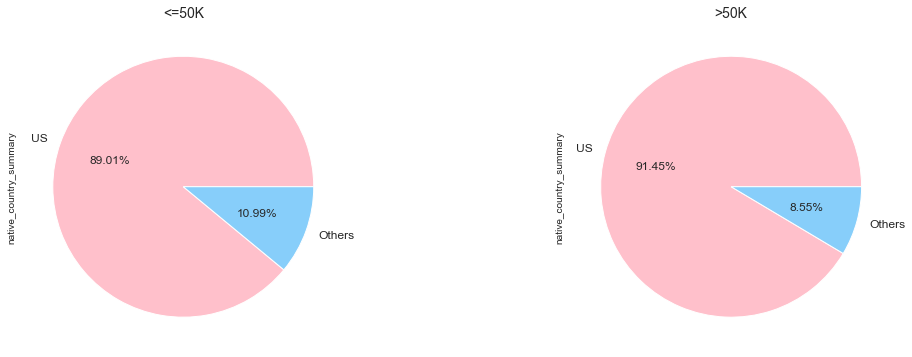

In [181]:
# Visualizing the percentage of persons in each sub-categories of "native_country_summary" by "salary" levels  

plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2]:
    plt.subplot(1, 2, index)
    country[i:i+2].plot.pie(subplots=True,
                            labels=["US", "Others"],
                            autopct="%.2f%%",
                            textprops={'fontsize': 12},
                            colors=['pink', 'lightskyblue'],
                            )
    plt.title(country.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

# Other Specific Questions

In [182]:
# Determining the average of people in each sub-categories of "gender" by "salary"  

df.groupby(["salary", "gender"]).age.mean()

salary  gender
<=50K   Female   36.217
        Male     37.149
>50K    Female   42.126
        Male     44.627
Name: age, dtype: float64

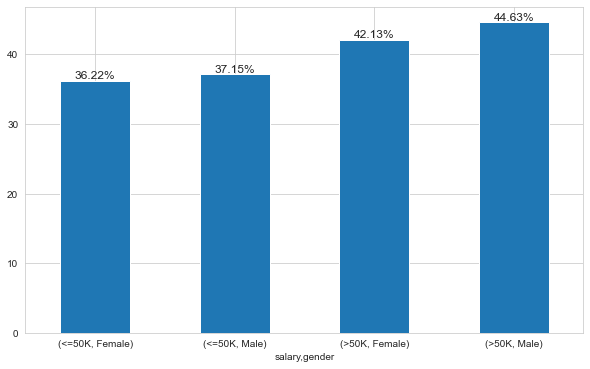

In [183]:
# With Pandas

# Visualizing the average of people in each sub-categories of "gender" by "salary" with Pandas 

fig, ax = plt.subplots()

ax = df.groupby(["salary", "gender"]).age.mean().plot.bar()
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=12);

In [184]:
age = df.groupby(["salary", "gender"])[["age"]].mean().reset_index()
age

,salary,gender,age
0,<=50K,Female,36.217
1,<=50K,Male,37.149
2,>50K,Female,42.126
3,>50K,Male,44.627


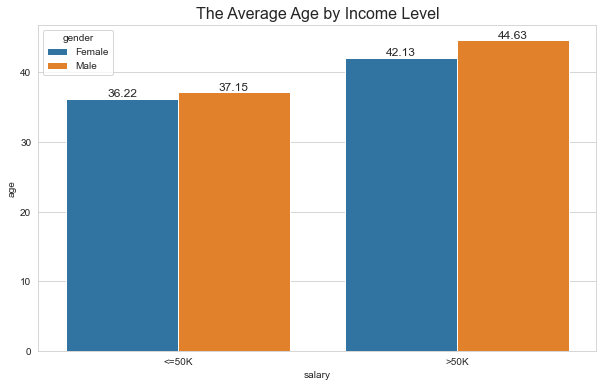

In [185]:
# With Seaborn

# Visualizing the average of people in each sub-categories of "gender" by "salary" with Seaborn 

fig, ax = plt.subplots()

ax = sns.barplot(data=age, x="salary", y="age", hue="gender")

plt.title("The Average Age by Income Level", fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=12);

In [186]:
# Determining the percentage of US citizens in high-level income group 

workclass_US = df[(df.salary == ">50K") & (df.native_country_summary == "US")]\
                                                    .workclass.value_counts(dropna=False, normalize=True)*100
workclass_US

Private            63.314
Self-emp-not-inc    9.192
Local-gov           8.021
Self-emp-inc        7.784
Federal-gov         4.687
State-gov           4.547
Unknown             2.455
Name: workclass, dtype: float64

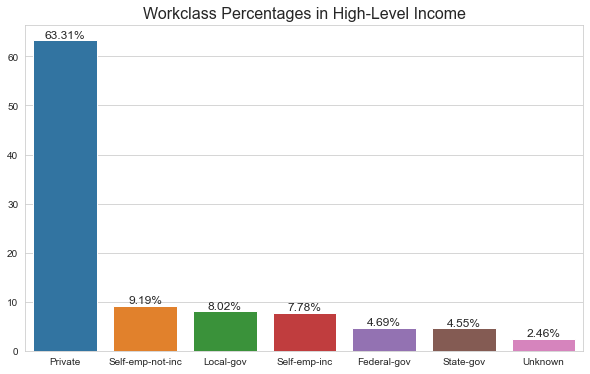

In [187]:
# Visualizing the percentage of US citizens in high-level income group 

fig, ax = plt.subplots()

ax = sns.barplot(x=workclass_US.index, y=workclass_US.values)

plt.title("Workclass Percentages in High-Level Income", fontsize=16)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=12);

In [188]:
# Determining the percentage of US citizens who work as "Private" workclass in high-level income 

occupation_US = df[(df.salary == ">50K") & (df.native_country_summary == "US") & (df.workclass == "Private")]\
                  .occupation.value_counts(dropna=False, normalize=True)*100 
occupation_US

Exec-managerial     26.438
Prof-specialty      19.476
Craft-repair        14.695
Sales               14.475
Adm-clerical         6.389
Transport-moving     5.442
Tech-support         4.428
Machine-op-inspct    4.428
Other-service        1.674
Handlers-cleaners    1.344
Farming-fishing      0.595
Protective-serv      0.595
Priv-house-serv      0.022
Name: occupation, dtype: float64

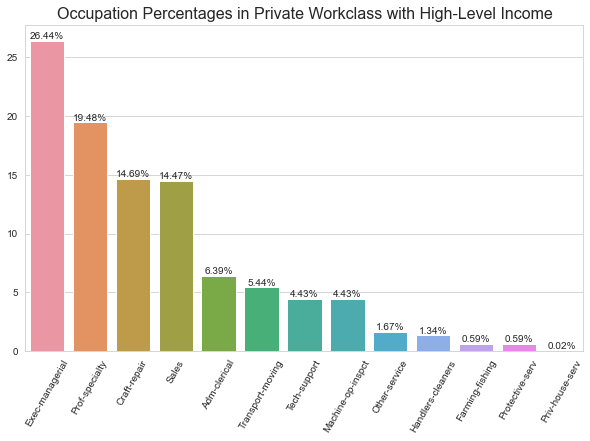

In [189]:
# Visualizng the percentage of US citizens who work as "Private" workclass in high-level income 

fig, ax = plt.subplots()

ax = sns.barplot(x=occupation_US.index, y=occupation_US.values)

plt.title("Occupation Percentages in Private Workclass with High-Level Income", fontsize=16)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=10);

In [190]:
# Determining the percentage of educational level of US citizens whose origin is Asian-Pac-Islander and income level is high 

Asian_Pac_Islander_Edu = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander")]\
                     .education.value_counts(dropna=False, normalize=True)*100 
Asian_Pac_Islander_Edu

Bachelors      35.145
Masters        15.580
HS-grad        12.319
Some-college   11.957
Prof-school     9.783
Doctorate       6.522
Assoc-voc       3.261
Assoc-acdm      2.899
5th-6th         1.087
9th             0.362
11th            0.362
10th            0.362
12th            0.362
Name: education, dtype: float64

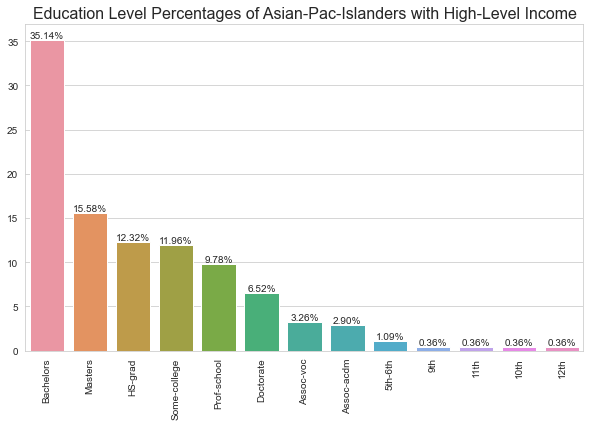

In [191]:
# Visualizing the percentage of educational level of US citizens whose origin is Asian-Pac-Islander and income level is high 

fig, ax = plt.subplots()

ax = sns.barplot(x=Asian_Pac_Islander_Edu.index, y=Asian_Pac_Islander_Edu.values)

plt.title("Education Level Percentages of Asian-Pac-Islanders with High-Level Income", fontsize=16)
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=10);

In [192]:
# Determining the percentage of occupation of US citizens 
# whose origin is Asian-Pac-Islander and has Bachelors degree in high-level income group 

Asian_Pac_Islander_Occupation = df[(df.salary == ">50K") & (df.race == "Asian-Pac-Islander") & (df.education == "Bachelors")]\
                                 .occupation.value_counts(dropna=False, normalize=True)*100 
Asian_Pac_Islander_Occupation

Exec-managerial     27.835
Prof-specialty      25.773
Adm-clerical        12.371
Sales                9.278
Other-service        9.278
Craft-repair         7.216
Tech-support         3.093
Protective-serv      2.062
Transport-moving     1.031
Machine-op-inspct    1.031
Farming-fishing      1.031
Name: occupation, dtype: float64

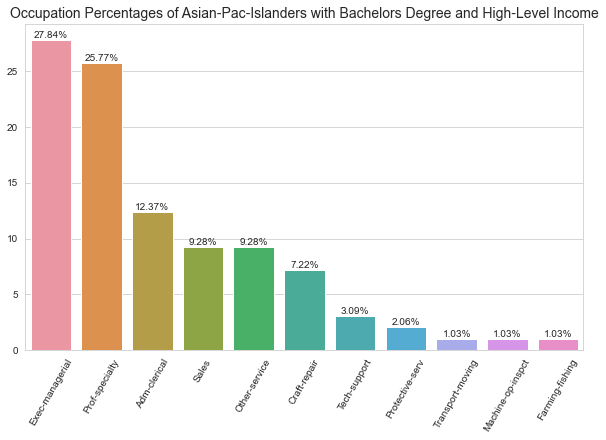

In [193]:
# Visualizing the percentage of occupation of US citizens 
# whose origin is Asian-Pac-Islander and has Bachelors degree in high-level income group 

fig, ax = plt.subplots()

ax = sns.barplot(x=Asian_Pac_Islander_Occupation.index, y=Asian_Pac_Islander_Occupation.values)

plt.title("Occupation Percentages of Asian-Pac-Islanders with Bachelors Degree and High-Level Income", fontsize=14)
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", fontsize=10);

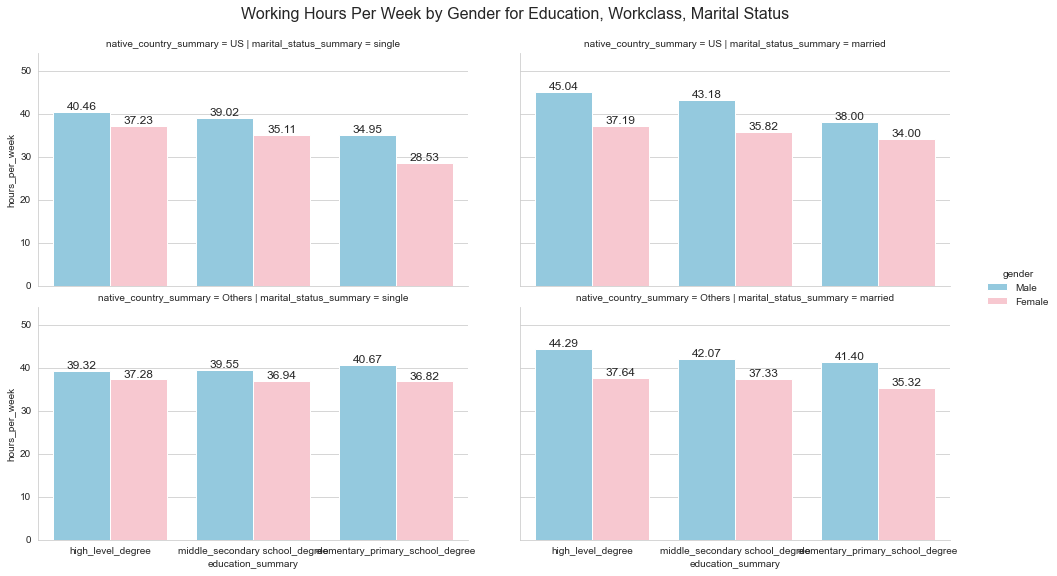

In [194]:
# Visualizing the average of working hours per week by gender for education level, workclass and marital status 

g = sns.catplot(x="education_summary",
                y="hours_per_week",
                data=df,
                kind="bar",
                estimator= np.mean,
                hue="gender",
                col="marital_status_summary",
                row="native_country_summary",
                ci=None,
                palette=sns.color_palette(['skyblue', 'pink']));

g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Working Hours Per Week by Gender for Education, Workclass, Marital Status', fontsize=16)

# iterate through axes
for ax in g.axes.ravel():

    # add annotations
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", fontsize=12);
    
    ax.margins(y=0.2)

plt.show()

# Dropping Similar & Unneccessary Features


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32537 non-null  int64  
 1   workclass               32537 non-null  object 
 2   fnlwgt                  32537 non-null  int64  
 3   education               32537 non-null  object 
 4   education_num           31735 non-null  float64
 5   marital_status          32537 non-null  object 
 6   occupation              32537 non-null  object 
 7   relationship            32537 non-null  object 
 8   race                    32537 non-null  object 
 9   gender                  32537 non-null  object 
 10  capital_gain            32537 non-null  int64  
 11  capital_loss            32537 non-null  int64  
 12  hours_per_week          32537 non-null  int64  
 13  native_country          32537 non-null  object 
 14  salary                  32537 non-null

In [196]:
df.drop(columns=["education", "education_num", "relationship", "marital_status", "native_country"], inplace=True)

# Handling with Missing Value

In [197]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [198]:
df.shape

(32537, 13)

In [199]:
df.duplicated().value_counts() 

False    32515
True        22
dtype: int64

In [200]:
df.drop_duplicates(keep='first', inplace=True)  

In [201]:
df.shape

(32515, 13)

Decide if it's necessary to drop the "Unknown" string values or not?

In [202]:
df.workclass.value_counts()

Private             22652
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1835
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [203]:
df.occupation.value_counts()

Prof-specialty       4135
Craft-repair         4089
Exec-managerial      4065
Adm-clerical         3763
Sales                3645
Other-service        3288
Machine-op-inspct    1999
Unknown              1842
Transport-moving     1597
Handlers-cleaners    1368
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [204]:
# Let's examine what kind sub-categories of "workclass" there have been regarding "occupation" 

df[df.occupation == "Unknown"].workclass.value_counts()

Unknown         1835
Never-worked       7
Name: workclass, dtype: int64

In [205]:
# As seen, it is almost imposibble to extract some insights from the output

df[df.occupation == "Unknown"]

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
27,54,Unknown,180211,Unknown,Asian-Pac-Islander,Male,0,0,60,>50K,high_level_degree,married,Others
61,32,Unknown,293936,Unknown,White,Male,0,0,40,<=50K,middle_secondary school_degree,married,Others
69,25,Unknown,200681,Unknown,White,Male,0,0,40,<=50K,high_level_degree,single,US
77,67,Unknown,212759,Unknown,White,Male,0,0,2,<=50K,middle_secondary school_degree,married,US
106,17,Unknown,304873,Unknown,White,Female,34095,0,32,<=50K,middle_secondary school_degree,single,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Unknown,320084,Unknown,White,Female,0,0,55,>50K,high_level_degree,married,US
32531,30,Unknown,33811,Unknown,Asian-Pac-Islander,Female,0,0,99,<=50K,high_level_degree,single,US
32539,71,Unknown,287372,Unknown,White,Male,0,0,10,>50K,high_level_degree,married,US
32541,41,Unknown,202822,Unknown,Black,Female,0,0,32,<=50K,middle_secondary school_degree,single,US


In [206]:
df[df.occupation == "Unknown"].groupby(["occupation", "workclass"])["salary"].agg(pd.Series.mode)

occupation  workclass   
Unknown     Never-worked    <=50K
            Unknown         <=50K
Name: salary, dtype: object

In [207]:
df[df.occupation == "Unknown"].groupby(["occupation", "workclass"])\
.agg({"marital_status_summary": pd.Series.mode, "salary": pd.Series.mode, "native_country_summary": pd.Series.mode, "education_summary": pd.Series.mode, "race": pd.Series.mode, "gender": pd.Series.mode})

# df[df.occupation == "Unknown"].groupby(["occupation", "workclass"])["marital_status_summary", "salary", "native_country_summary", "education_summary", "race", "gender"]\
#                               .apply(lambda x : x.agg(pd.Series.mode))

marital_status_summary salary native_country_summary  \
occupation workclass                                                           
Unknown    Never-worked                 single  <=50K                     US   
           Unknown                      single  <=50K                     US   

                                      education_summary   race gender  
occupation workclass                                                   
Unknown    Never-worked  middle_secondary school_degree  White   Male  
           Unknown       middle_secondary school_degree  White   Male

Even if you may prefer to fill them with the findings above; however, we will NOT pick up this approach since we assume that we have enough observation to continue for analysis.

In [208]:
# So, let's assign these "Unknown" values to "NaN"

df.replace("Unknown", np.nan, inplace=True)

In [209]:
df.isnull().sum()

age                          0
workclass                 1835
fnlwgt                       0
occupation                1842
race                         0
gender                       0
capital_gain                 0
capital_loss                 0
hours_per_week               0
salary                       0
education_summary            0
marital_status_summary       0
native_country_summary       0
dtype: int64

In [210]:
# Then, we can exclude them from our DataFrame 

df.dropna(inplace=True)

In [211]:
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30673 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30673 non-null  int64 
 1   workclass               30673 non-null  object
 2   fnlwgt                  30673 non-null  int64 
 3   occupation              30673 non-null  object
 4   race                    30673 non-null  object
 5   gender                  30673 non-null  object
 6   capital_gain            30673 non-null  int64 
 7   capital_loss            30673 non-null  int64 
 8   hours_per_week          30673 non-null  int64 
 9   salary                  30673 non-null  object
 10  education_summary       30673 non-null  object
 11  marital_status_summary  30673 non-null  object
 12  native_country_summary  30673 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


# Handling with Outliers

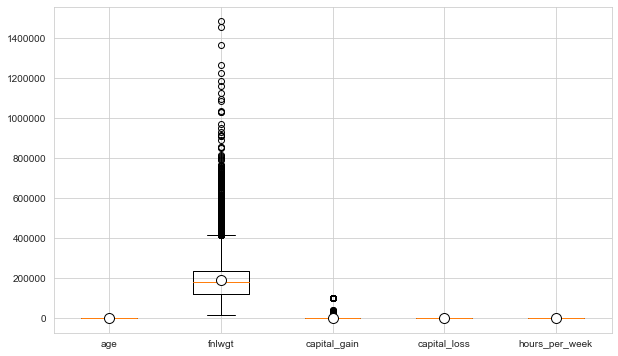

In [213]:
plt.boxplot((df[df.select_dtypes('number').columns]), 
            labels=df.select_dtypes('number').columns,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y')
plt.show()

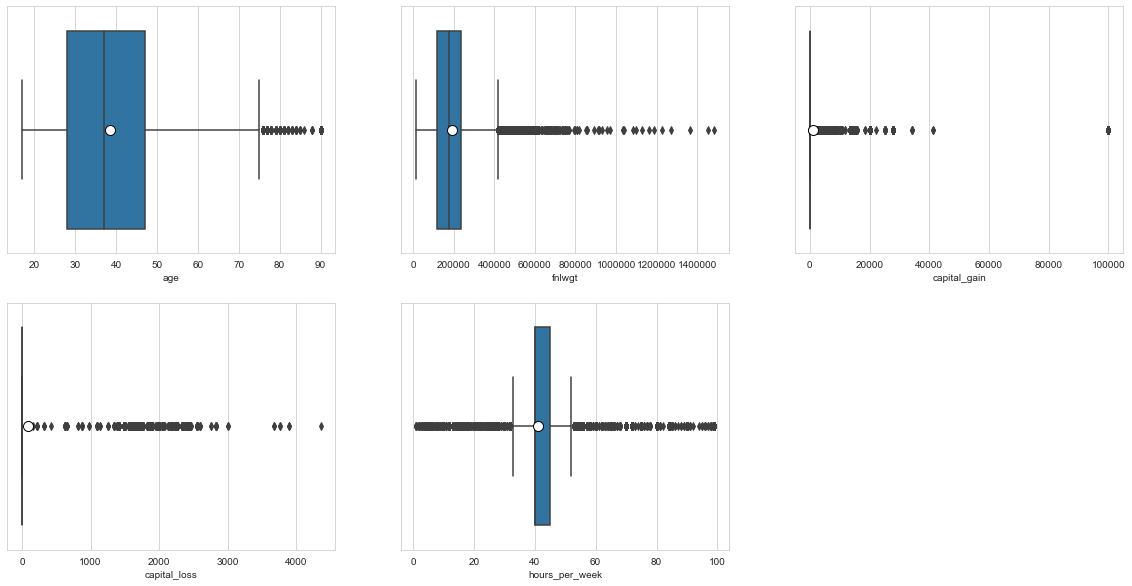

In [214]:
index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2, 3, index)
    sns.boxplot(x=feature, 
                data=df, 
                whis=1.5,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
    plt.ticklabel_format(style='plain', axis='x')

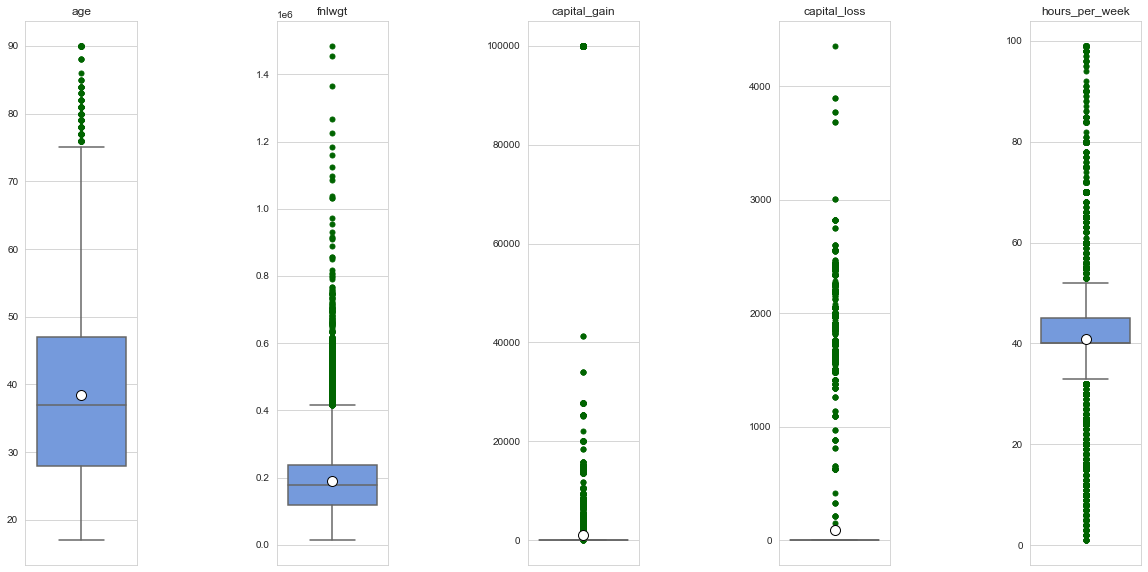

In [215]:
numerical_features_df = df.select_dtypes('number')
numerical_features_df

inputs = numerical_features_df.columns
num_inputs = len(inputs)

fig, ax = plt.subplots(1, num_inputs, figsize=(20, 10))

for i, (ax, curve) in enumerate(zip(ax.flat, inputs)):
    sns.boxplot(y=numerical_features_df[curve], 
                ax=ax, 
                color='cornflowerblue', 
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"},
                flierprops={'marker':'o',
                            'markerfacecolor':'darkgreen',
                            'markeredgecolor':'darkgreen'})
    
    ax.set_title(inputs[i])
    ax.set_ylabel('')
    
plt.subplots_adjust(hspace=0.15, wspace=1.25)
plt.show()

In [216]:
list(zip(df.select_dtypes('number').columns, [(1, 2),(3, 4),(5, 6),(7, 8),(9, 10)]))

[('age', (1, 2)),
 ('fnlwgt', (3, 4)),
 ('capital_gain', (5, 6)),
 ('capital_loss', (7, 8)),
 ('hours_per_week', (9, 10))]

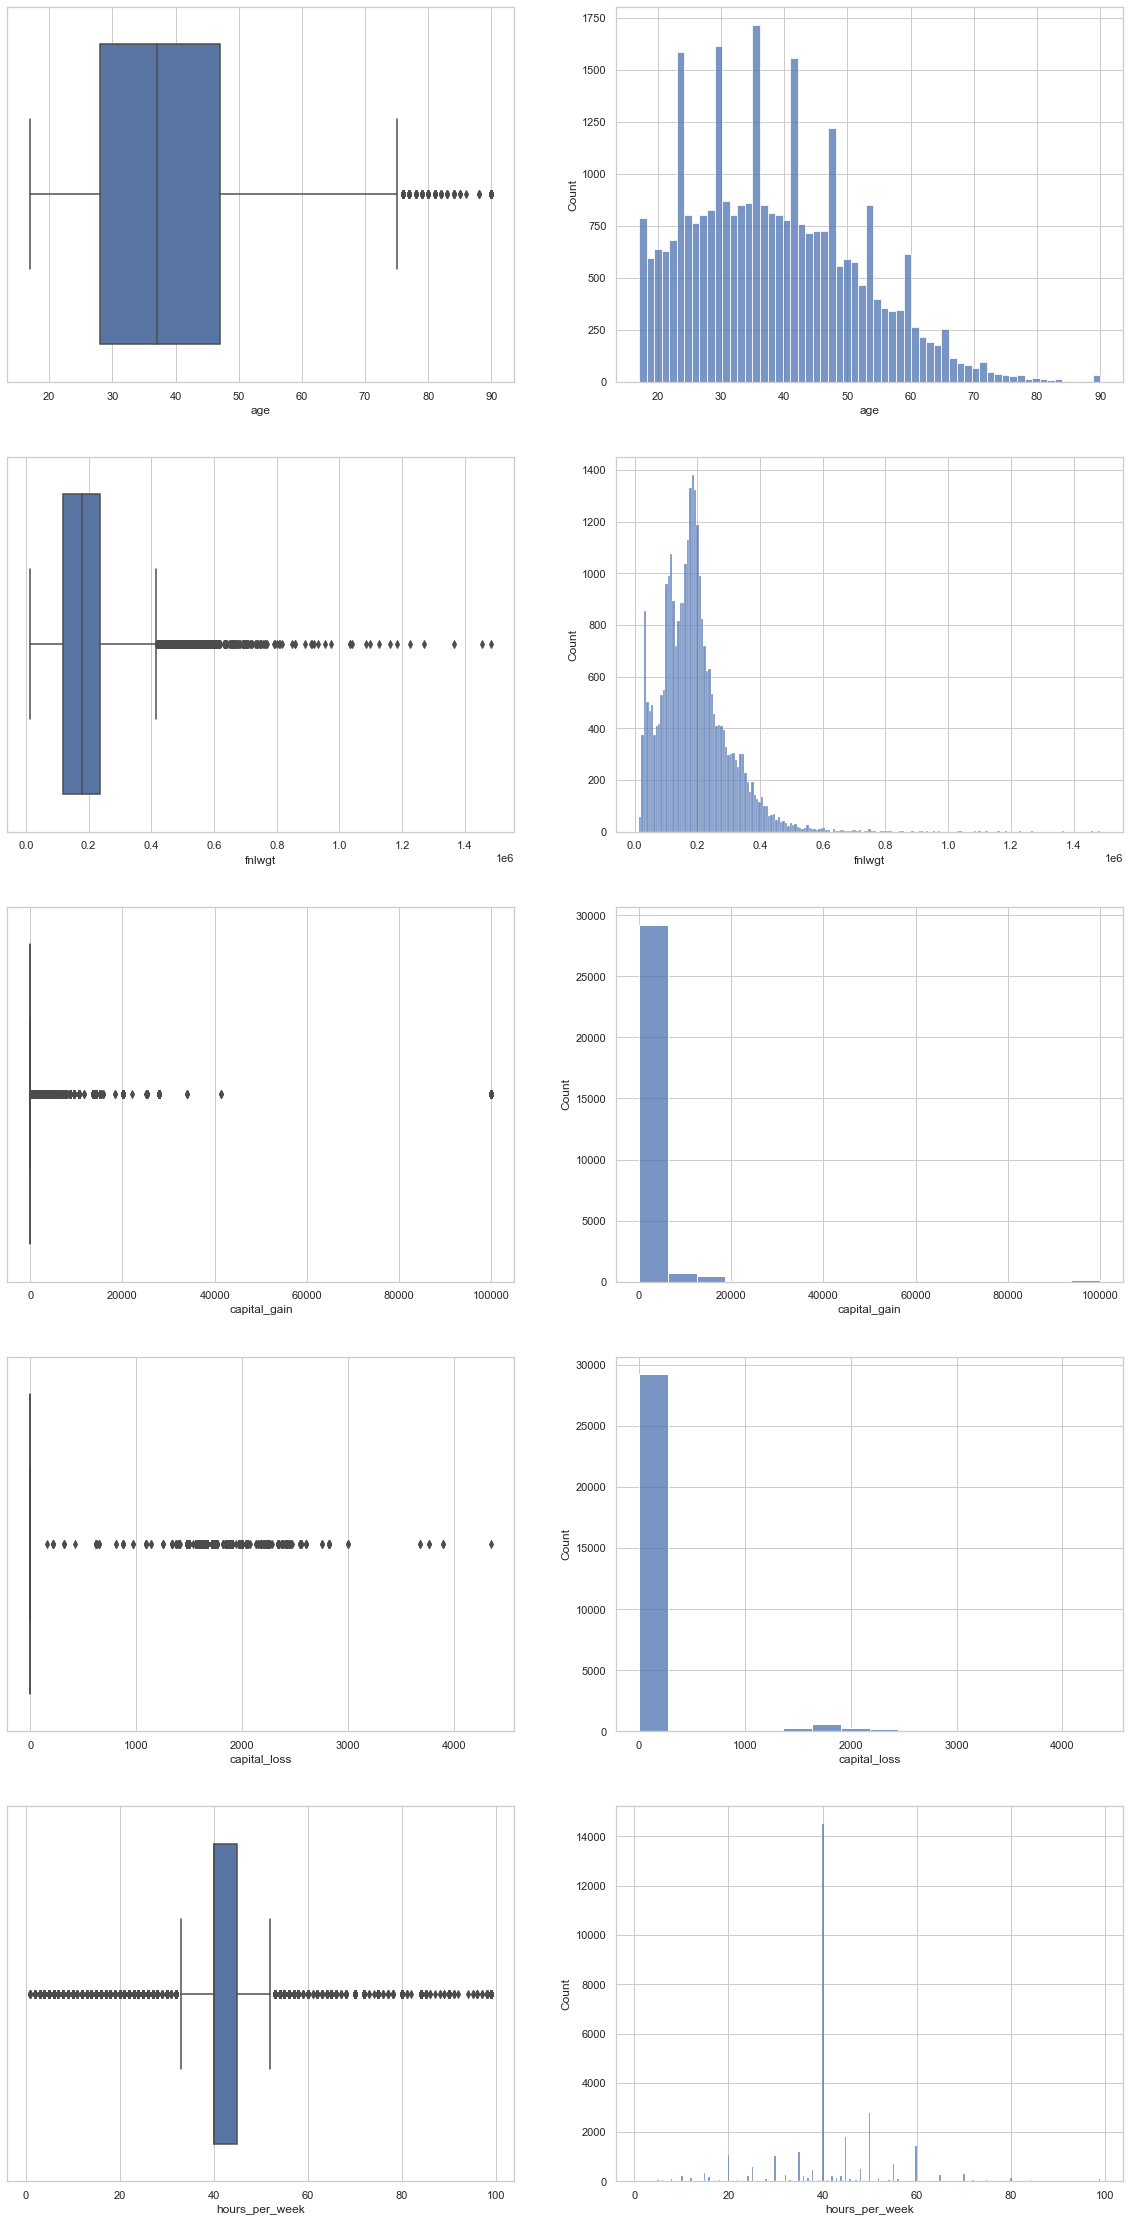

In [217]:
plt.figure(figsize=(20, 40))

sns.set(style="whitegrid", font_scale=1)

for i, j in list(zip(df.select_dtypes('number').columns, [(1, 2),(3, 4),(5, 6),(7, 8),(9, 10)])):
    plt.subplot(5, 2, j[0])
    sns.boxplot(x=df.select_dtypes('number')[i])
    plt.subplot(5, 2, j[1])
    sns.histplot(x=df.select_dtypes('number')[i])

In [218]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30673.000,38.455,13.115,17.000,28.000,37.000,47.000,90.000
fnlwgt,30673.000,189865.663,105472.487,13769.000,117816.000,178551.000,237317.000,1484705.000
capital_gain,30673.000,1107.660,7503.242,0.000,0.000,0.000,0.000,99999.000
capital_loss,30673.000,89.041,405.940,0.000,0.000,0.000,0.000,4356.000
hours_per_week,30673.000,40.956,11.986,1.000,40.000,40.000,45.000,99.000


In [219]:
df[df["hours_per_week"] > 70]

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
10,37,Private,280464,Exec-managerial,Black,Male,0,0,80,>50K,high_level_degree,married,US
28,39,Private,367260,Exec-managerial,White,Male,0,0,80,<=50K,middle_secondary school_degree,single,US
265,37,Self-emp-inc,257295,Exec-managerial,Asian-Pac-Islander,Male,0,0,75,>50K,high_level_degree,married,Others
272,50,Self-emp-not-inc,30653,Farming-fishing,White,Male,2407,0,98,<=50K,high_level_degree,married,US
299,38,Private,169469,Sales,White,Male,0,0,80,<=50K,middle_secondary school_degree,single,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32391,55,Private,199763,Protective-serv,White,Male,0,0,81,<=50K,middle_secondary school_degree,single,US
32402,42,Private,288154,Craft-repair,White,Male,0,0,89,>50K,high_level_degree,married,US
32432,36,Private,208068,Other-service,Other,Male,0,0,72,<=50K,elementary_primary_school_degree,single,Others
32469,58,Self-emp-inc,181974,Prof-specialty,White,Female,0,0,99,<=50K,high_level_degree,single,Others


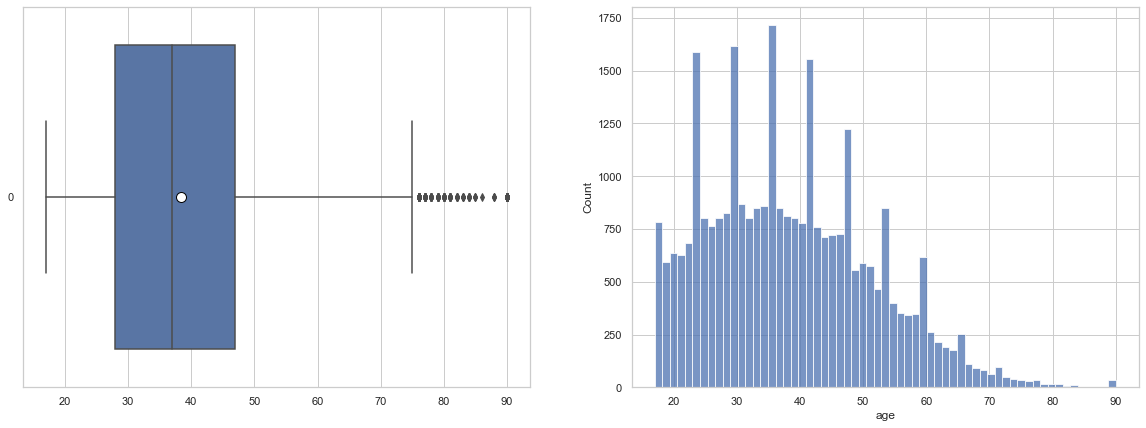

In [220]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data=df.age,
            orient="h",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.subplot(1, 2, 2)
sns.histplot(data=df.age);

In [221]:
low = df.age.quantile(0.25)
high = df.age.quantile(0.75)
IQR = high - low
low, high, IQR

(28.0, 47.0, 19.0)

In [222]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(-0.5, 75.5)

In [223]:
df[df.age > upper_lim].age.value_counts()

90    35
76    30
77    20
80    16
79    15
81    14
78    14
84     8
82     7
83     5
88     3
85     3
86     1
Name: age, dtype: int64

In [224]:
df[df.age > upper_lim].sort_values(by="age", ascending=False)

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
8806,90,Private,87372,Prof-specialty,White,Male,20051,0,72,>50K,high_level_degree,married,US
14159,90,Local-gov,187749,Adm-clerical,Asian-Pac-Islander,Male,0,0,20,<=50K,high_level_degree,married,Others
28463,90,Federal-gov,195433,Craft-repair,White,Male,0,0,30,<=50K,middle_secondary school_degree,married,US
12975,90,Private,250832,Exec-managerial,White,Male,0,0,40,<=50K,middle_secondary school_degree,married,US
11996,90,Private,40388,Exec-managerial,White,Male,0,0,55,<=50K,high_level_degree,single,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15102,76,Local-gov,169133,Adm-clerical,White,Female,0,0,30,<=50K,high_level_degree,single,US
19085,76,Private,125784,Exec-managerial,White,Male,0,0,40,<=50K,high_level_degree,married,US
23515,76,Private,142535,Adm-clerical,White,Male,0,0,6,<=50K,middle_secondary school_degree,single,US
8240,76,Self-emp-not-inc,225964,Sales,White,Male,0,0,8,<=50K,high_level_degree,single,US


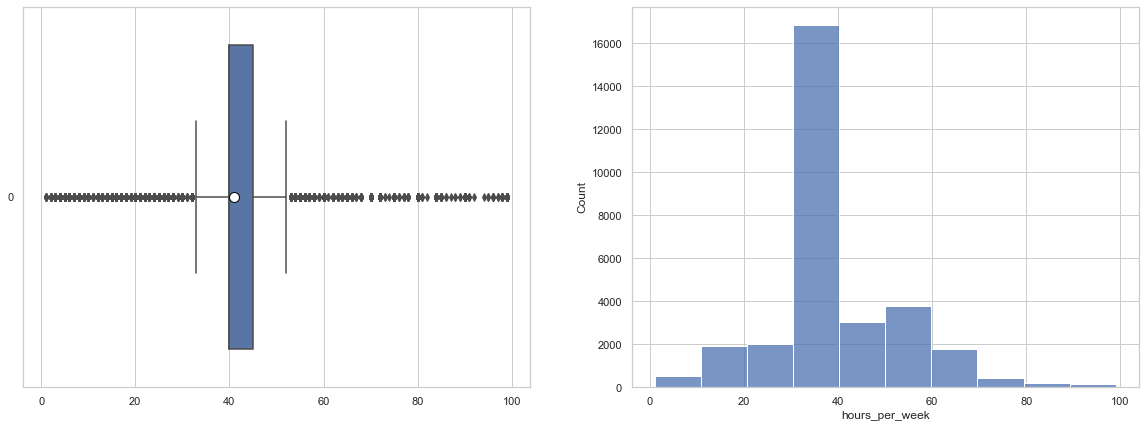

In [225]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data=df.hours_per_week,
            orient="h",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.subplot(1, 2, 2)
sns.histplot(data=df.hours_per_week, bins=10);

In [226]:
low = df.hours_per_week.quantile(0.25)
high = df.hours_per_week.quantile(0.75)
IQR = high - low
low, high, IQR

(40.0, 45.0, 5.0)

In [227]:
lower_lim = low - (1.5 * IQR)
upper_lim = high + (1.5 * IQR)
lower_lim, upper_lim

(32.5, 52.5)

In [228]:
df[df.hours_per_week > upper_lim].hours_per_week.value_counts().sort_index(ascending=False)

99      80
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      28
89       2
88       2
87       1
86       2
85      13
84      41
82       1
81       3
80     124
78       8
77       6
76       3
75      63
74       1
73       2
72      68
70     284
68      12
67       4
66      17
65     242
64      14
63      10
62      18
61       2
60    1441
59       5
58      27
57      17
56      91
55     683
54      39
53      23
Name: hours_per_week, dtype: int64

In [229]:
df[df.hours_per_week > upper_lim].sort_values(by="hours_per_week", ascending=False)

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
25986,44,Local-gov,212665,Protective-serv,Black,Male,0,0,99,<=50K,high_level_degree,married,US
19529,38,Private,66326,Transport-moving,White,Male,0,0,99,<=50K,middle_secondary school_degree,married,US
8796,39,Private,70995,Transport-moving,White,Male,15024,0,99,>50K,high_level_degree,married,US
15534,29,Private,167716,Other-service,White,Female,0,0,99,<=50K,middle_secondary school_degree,single,US
22313,26,Self-emp-not-inc,258306,Farming-fishing,White,Male,0,0,99,<=50K,middle_secondary school_degree,married,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,27,Private,138705,Craft-repair,White,Male,0,0,53,<=50K,middle_secondary school_degree,married,US
23244,58,Private,248739,Farming-fishing,White,Male,0,0,53,>50K,middle_secondary school_degree,married,US
28858,62,Private,123411,Transport-moving,White,Male,0,0,53,<=50K,middle_secondary school_degree,married,US
18417,24,Private,117167,Other-service,White,Female,0,0,53,<=50K,high_level_degree,single,US


In [230]:
df[df.hours_per_week < lower_lim].hours_per_week.value_counts().sort_index()

1        8
2       15
3       24
4       28
5       39
6       40
7       20
8      103
9       17
10     223
11       9
12     143
13      19
14      28
15     350
16     182
17      27
18      64
19      14
20    1063
21      23
22      39
23      20
24     220
25     582
26      30
27      28
28      74
29       6
30    1008
31       5
32     239
Name: hours_per_week, dtype: int64

In [231]:
df[df.hours_per_week < lower_lim].groupby("salary").hours_per_week.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,4368.000,21.548,7.345,1.000,16.000,20.000,30.000,32.000
>50K,322.000,22.028,7.813,1.000,18.000,24.000,30.000,32.000


In [232]:
df[df.hours_per_week < lower_lim].groupby("salary").age.describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,4368.000,34.059,17.735,17.000,20.000,26.000,45.000,90.000
>50K,322.000,49.484,13.894,22.000,39.000,48.000,60.000,90.000


Dropping rows according to the domain knownledge

In [233]:
df[(df.age < 17) |  (df.age > 80)].sort_values(by="age", ascending=False)

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
222,90,Private,51744,Other-service,Black,Male,0,2206,40,<=50K,middle_secondary school_degree,single,US
18832,90,Private,115306,Exec-managerial,White,Female,0,0,40,<=50K,high_level_degree,single,US
10545,90,Private,175491,Craft-repair,White,Male,9386,0,50,>50K,middle_secondary school_degree,married,Others
11512,90,Private,87285,Other-service,White,Female,0,0,24,<=50K,middle_secondary school_degree,single,US
11996,90,Private,40388,Exec-managerial,White,Male,0,0,55,<=50K,high_level_degree,single,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,81,State-gov,132204,Other-service,White,Female,0,0,20,<=50K,elementary_primary_school_degree,single,US
6748,81,Private,122651,Sales,White,Male,0,0,15,<=50K,high_level_degree,married,US
2906,81,Private,114670,Priv-house-serv,Black,Female,2062,0,5,<=50K,middle_secondary school_degree,single,US
21501,81,Private,177408,Exec-managerial,White,Male,0,2377,26,>50K,middle_secondary school_degree,married,US


In [234]:
df[(df.age < 17) | (df.age > 80)].shape

(76, 13)

In [235]:
drop_index = df[(df.age < 17) | (df.age > 80)].sort_values(by="age", ascending=False).index
drop_index

Int64Index([  222, 18832, 10545, 11512, 11996, 12975, 14159, 15892, 18277,
            18413, 18725, 19212,  8973, 19489, 19747, 20610, 22220, 24043,
            28463, 31030, 32277, 32367, 10210, 15356,  5370,  4070,  1040,
             6232,  1935,  2303,  5272,  6624,  2891,  5406,  8806,  1168,
            22895, 21835, 24027, 20463,  8381, 32459, 26731, 27795,  9471,
             6214, 14711, 11238,  7720, 15662,  7481, 24395, 23459, 19172,
            16302, 14756,  8431, 20421, 22481, 31855, 13696, 24280,  4834,
            29594, 28948, 12830,   918, 13295, 24560,  3537, 13928, 19045,
             6748,  2906, 21501, 19495],
           dtype='int64')

In [236]:
df.drop(drop_index, inplace=True)

In [237]:
df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].sort_values(by="hours_per_week", ascending=False)

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
22216,45,Private,54260,Craft-repair,White,Male,0,0,99,<=50K,high_level_degree,single,US
5432,44,Private,83508,Prof-specialty,White,Female,2354,0,99,<=50K,high_level_degree,single,US
19053,27,Private,40295,Transport-moving,White,Male,0,0,99,<=50K,middle_secondary school_degree,single,US
19141,59,Private,106748,Other-service,White,Female,0,0,99,<=50K,middle_secondary school_degree,married,US
19399,39,Self-emp-inc,163057,Craft-repair,White,Male,0,0,99,<=50K,high_level_degree,single,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20909,77,Self-emp-not-inc,71676,Adm-clerical,White,Female,0,1944,1,<=50K,high_level_degree,single,US
25078,74,Private,260669,Other-service,White,Female,0,0,1,<=50K,middle_secondary school_degree,single,US
19750,23,Private,72887,Craft-repair,Asian-Pac-Islander,Male,0,0,1,<=50K,middle_secondary school_degree,single,Others
189,58,State-gov,109567,Prof-specialty,White,Male,0,0,1,>50K,high_level_degree,married,US


In [238]:
df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].shape

(621, 13)

In [239]:
drop_index = df[(df.hours_per_week < 7) | (df.hours_per_week > 70)].sort_values(by="hours_per_week", ascending=False).index
drop_index

Int64Index([22216,  5432, 19053, 19141, 19399, 19529, 19731, 19997, 20036,
            21056,
            ...
             6180, 29867,  1036, 11451, 22960, 20909, 25078, 19750,   189,
            24284],
           dtype='int64', length=621)

In [240]:
df.drop(drop_index, inplace=True)

In [241]:
df[(df.age > 60) & (df.hours_per_week > 60)]

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
1541,62,Private,162245,Prof-specialty,White,Male,0,1628,70,<=50K,high_level_degree,married,US
2154,75,Private,101887,Priv-house-serv,White,Female,0,0,70,<=50K,middle_secondary school_degree,single,US
2184,63,Self-emp-inc,54052,Sales,White,Male,0,0,68,>50K,high_level_degree,married,US
2665,70,Private,94692,Sales,White,Male,0,0,70,>50K,high_level_degree,married,US
3101,65,Self-emp-inc,81413,Farming-fishing,White,Male,0,2352,65,<=50K,middle_secondary school_degree,married,US
5417,67,Private,197816,Sales,White,Male,0,1844,70,<=50K,high_level_degree,married,US
6826,68,Private,284763,Transport-moving,White,Male,0,0,70,<=50K,middle_secondary school_degree,single,US
8066,61,Self-emp-not-inc,133969,Sales,Asian-Pac-Islander,Male,0,0,63,<=50K,middle_secondary school_degree,married,Others
9646,62,Self-emp-not-inc,26911,Other-service,White,Female,0,0,66,<=50K,middle_secondary school_degree,single,US
12624,63,Self-emp-inc,110890,Prof-specialty,White,Male,0,0,70,>50K,high_level_degree,single,US


In [242]:
df[(df.age > 60) & (df.hours_per_week > 60)].shape

(23, 13)

In [243]:
drop_index = df[(df.age > 60) & (df.hours_per_week > 60)].index
drop_index

Int64Index([ 1541,  2154,  2184,  2665,  3101,  5417,  6826,  8066,  9646,
            12624, 16634, 18367, 19584, 20125, 23399, 23585, 24903, 25910,
            26625, 27721, 28294, 31342, 32192],
           dtype='int64')

In [244]:
df.drop(drop_index, inplace=True)

In [245]:
df.shape

(29953, 13)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     29953 non-null  int64 
 1   workclass               29953 non-null  object
 2   fnlwgt                  29953 non-null  int64 
 3   occupation              29953 non-null  object
 4   race                    29953 non-null  object
 5   gender                  29953 non-null  object
 6   capital_gain            29953 non-null  int64 
 7   capital_loss            29953 non-null  int64 
 8   hours_per_week          29953 non-null  int64 
 9   salary                  29953 non-null  object
 10  education_summary       29953 non-null  object
 11  marital_status_summary  29953 non-null  object
 12  native_country_summary  29953 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [247]:
df.reset_index(drop=True, inplace=True)
df

,age,workclass,fnlwgt,occupation,race,gender,capital_gain,capital_loss,hours_per_week,salary,education_summary,marital_status_summary,native_country_summary
0,39,State-gov,77516,Adm-clerical,White,Male,2174,0,40,<=50K,high_level_degree,single,US
1,50,Self-emp-not-inc,83311,Exec-managerial,White,Male,0,0,13,<=50K,high_level_degree,married,US
2,38,Private,215646,Handlers-cleaners,White,Male,0,0,40,<=50K,middle_secondary school_degree,single,US
3,53,Private,234721,Handlers-cleaners,Black,Male,0,0,40,<=50K,middle_secondary school_degree,married,US
4,28,Private,338409,Prof-specialty,Black,Female,0,0,40,<=50K,high_level_degree,married,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29948,27,Private,257302,Tech-support,White,Female,0,0,38,<=50K,high_level_degree,married,US
29949,40,Private,154374,Machine-op-inspct,White,Male,0,0,40,>50K,middle_secondary school_degree,married,US
29950,58,Private,151910,Adm-clerical,White,Female,0,0,40,<=50K,middle_secondary school_degree,single,US
29951,22,Private,201490,Adm-clerical,White,Male,0,0,20,<=50K,middle_secondary school_degree,single,US


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     29953 non-null  int64 
 1   workclass               29953 non-null  object
 2   fnlwgt                  29953 non-null  int64 
 3   occupation              29953 non-null  object
 4   race                    29953 non-null  object
 5   gender                  29953 non-null  object
 6   capital_gain            29953 non-null  int64 
 7   capital_loss            29953 non-null  int64 
 8   hours_per_week          29953 non-null  int64 
 9   salary                  29953 non-null  object
 10  education_summary       29953 non-null  object
 11  marital_status_summary  29953 non-null  object
 12  native_country_summary  29953 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.0+ MB


Having dropped some of the extreme values using "Tukey's Fence", let us check the whisker plot again:

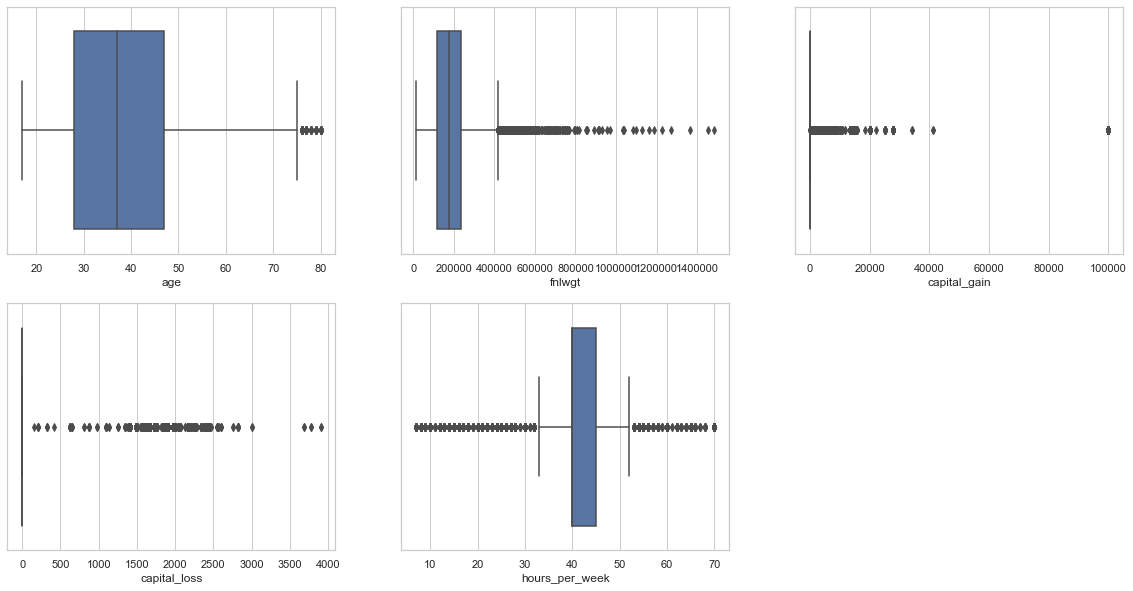

In [249]:
index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2, 3, index)
    sns.boxplot(x=feature, data=df)
    plt.ticklabel_format(style='plain', axis='x')

Boxplots are a great way to summarize the distribution of a dataset. But they become increasingly inaccurate when the size of a dataset grows. Therefore, Letter-Value Plots (or boxenplots) have been developed to overcome the problem of an inaccurate representation of outliers in boxplots.

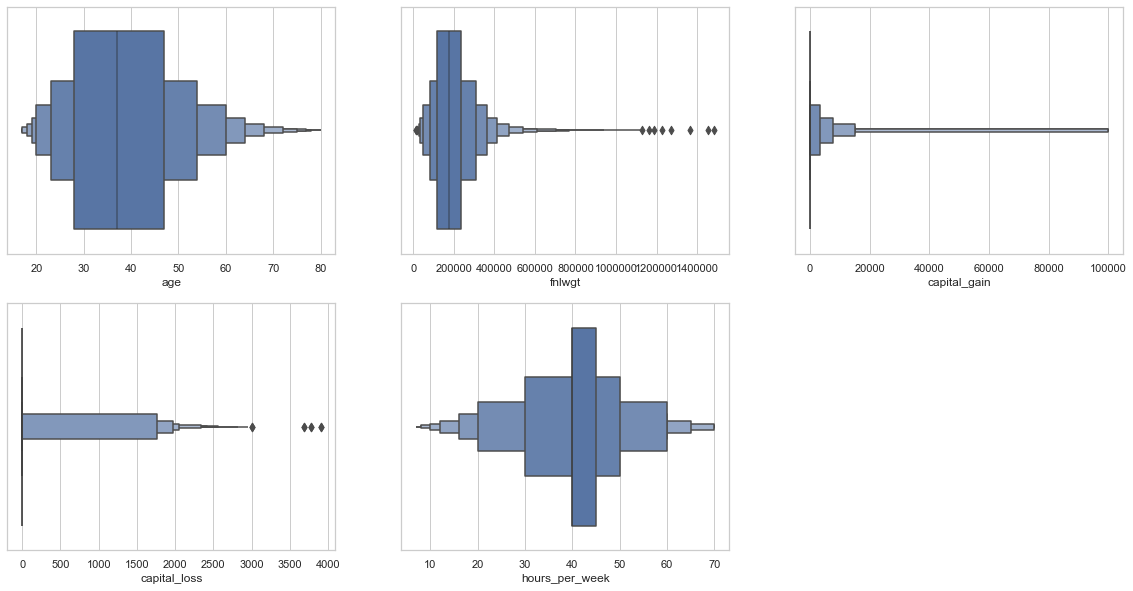

In [250]:
index = 0
plt.figure(figsize=(20, 10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2, 3, index)
    sns.boxenplot(x=feature, data=df)
    plt.ticklabel_format(style='plain', axis='x')

In [251]:
df.describe()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
count,29953.000,29953.000,29953.000,29953.000,29953.000
mean,38.252,190183.229,1093.079,88.423,40.472
std,12.852,105525.374,7425.027,403.594,10.446
min,17.000,13769.000,0.000,0.000,7.000
25%,28.000,117983.000,0.000,0.000,40.000
50%,37.000,178835.000,0.000,0.000,40.000
75%,47.000,237452.000,0.000,0.000,45.000
max,80.000,1484705.000,99999.000,3900.000,70.000


# Make the Dataset Ready for ML Models

### 1. Convert all features to numeric

**Convert target feature (salary) to numeric (0 and 1) by using map function**

In [252]:
df["salary"] = df.salary.map({"<=50K": 0, ">50K": 1})
df["salary"]

0        0
1        0
2        0
3        0
4        0
        ..
29948    0
29949    1
29950    0
29951    0
29952    1
Name: salary, Length: 29953, dtype: int64

In [253]:
df.salary.value_counts(dropna=False)

0    22505
1     7448
Name: salary, dtype: int64

**Convert all features to numeric by using get_dummies function**

In [254]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,salary,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,education_summary_high_level_degree,education_summary_middle_secondary school_degree,marital_status_summary_single,native_country_summary_US
0,39,77516,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1
1,50,83311,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1
2,38,215646,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
3,53,234721,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
4,28,338409,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29948,27,257302,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
29949,40,154374,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
29950,58,151910,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
29951,22,201490,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1


In [255]:
df.shape

(29953, 13)

In [256]:
df_dummy.shape

(29953, 34)

In [257]:
df_dummy.columns

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'salary', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Male',
       'education_summary_high_level_degree',
       'education_summary_middle_secondary school_degree',
       'marital_status_summary_single', 'native_country_summary_US'],
      dtype='object')

In [258]:
df_dummy_corr_salary = df_dummy.corr()[["salary"]].drop("salary").sort_values(by="salary", ascending=False)
df_dummy_corr_salary

,salary
age,0.253
hours_per_week,0.247
education_summary_high_level_degree,0.239
capital_gain,0.222
gender_Male,0.216
occupation_Exec-managerial,0.215
occupation_Prof-specialty,0.185
capital_loss,0.152
workclass_Self-emp-inc,0.138
race_White,0.086


In [259]:
df_dummy.to_csv("adult_dummy_hk.csv", index=False)

In [260]:
pd.read_csv('adult_dummy_hk.csv')

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,salary,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,education_summary_high_level_degree,education_summary_middle_secondary school_degree,marital_status_summary_single,native_country_summary_US
0,39,77516,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1
1,50,83311,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1
2,38,215646,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
3,53,234721,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
4,28,338409,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29948,27,257302,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
29949,40,154374,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
29950,58,151910,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
29951,22,201490,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
